In [1]:
from pyraf import iraf
from iraf import obsutil
import subprocess
from astropy.table import Table
import os
import csv
#in the furture make packages and import common functions
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from pyraf import gwm
from astropy.io import ascii
import numpy as np
from astropy.stats import sigma_clip
from iraf import psfmeasure
#from iraf import 

In [2]:
#from iraf import pstselect
from iraf import phot
from iraf import daofind


In [28]:
from iraf import daophot
from iraf import psf
from iraf import artdata
from iraf import mkobjects

In [4]:
imagename = '/data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits'
ext = 44

In [5]:
daoout = '{}daofindone'.format(ext)
photout = '{}photone'.format(ext)
psfout = '{}psfone'.format(ext)
groupout = '{}groupfileone'.format(ext)
opstout = '{}optsone'.format(ext)

In [21]:


daofind(imagename+'[{}]'.format(ext),output=daoout,sigma=1.0,threshold=100000,datamax=180000,roundlo=-0.3,roundhi=0.3)

# assoc = Table.read('44daofind',format='daophot')
# df = assoc.to_pandas()
# df2 = df.nlargest(1000,'FLUX')
# df.to_csv('pandas44',sep='\t')


FWHM of features in scale units (2.5) (CR or value): 	New FWHM of features: 2.5 scale units  2.5 pixels
Standard deviation of background in counts (1.) (CR or value): 	New standard deviation of background: 1. counts
Detection threshold in sigma (100000.) (CR or value): 	New detection threshold: 100000. sigma 100000. counts
Minimum good data value (INDEF) (CR or value): 	New minimum good data value: INDEF counts
Maximum good data value (180000.) (CR or value): 	New maximum good data value: 180000. counts



In [22]:
with open(daoout) as f:
    content = f.readlines()
    
print(len(content))

91


In [23]:
# with open('44phot') as f:
#     content = f.readlines()

# for x in range(60,len(content)):
#     if x%90 ==0:
#         newcontent.append(content[x])
# with open('pandas44','w') as f:
#     f.write(''.join(newcontent))
# with open('pandas44','r') as f:
#     bigstring = f.read()
# print(bigstring[0:10000])

In [8]:
# with open('44daofind') as f:
#     content = f.readlines()

# newcontent = content[0:60]
# for x in range(60,len(content)):
#     if x%90 ==0:
#         newcontent.append(content[x])
# with open('44daofindnew','w') as f:
#     f.write(''.join(newcontent))
# with open('44daofindnew','r') as f:
#     bigstring = f.read()

In [24]:
phot(imagename+'[{}]'.format(ext),skyfile=daoout,coords=daoout,output=photout,datamax=180000,interactive='no')



Centering algorithm (none) (CR or value): 	New centering algorithm: none
Sky fitting algorithm (mode) (CR or value): 	Sky fitting algorithm: mode
Inner radius of sky annulus in scale units (10.) (CR or value): 	New inner radius of sky annulus: 10. scale units 10. pixels
Width of the sky annulus in scale units (10.) (CR or value): 	New width of the sky annulus: 10. scale units 10. pixels
File/list of aperture radii in scale units (3.) (CR or value): 	Aperture radius 1: 3. scale units 3. pixels
Standard deviation of background in counts (0.) (CR or value): 	New standard deviation of background: 0. counts
Minimum good data value (INDEF) (CR or value): 	New minimum good data value: INDEF counts
Maximum good data value (180000.) (CR or value): 	New maximum good data value: 180000. counts



In [21]:
# with open('44phot') as f:
#     content = f.readlines()

# newcontent = content[0:60]
# for x in range(60,len(content)):
#     if x%90 ==0:
#         newcontent.append(content[x])
# with open('44photnew','w') as f:
#     f.write(''.join(newcontent))
# with open('44photnew','r') as f:
#     bigstring = f.read()
# # print(bigstring[0:10000])

# # with open('44phot') as f:
#     content = f.readlines()

# for x in range(60,len(content)):
#     if x%90 ==0:
#         newcontent.append(content[x])
# with open('44photnew','w') as f:
#     f.write(''.join(newcontent))
# with open('44photnew','r') as f:
#     bigstring = f.read()
# print(bigstring[0:10000])

In [22]:
print(bigstring[0:10000])

NameError: name 'bigstring' is not defined

In [25]:
psf(imagename+'[{}]'.format(ext),photfile=daoout,pstfile=photout,psfimage=psfout,opstfile=opstout,groupfile=groupout,interactive='no')


Analytic psf function(s) (gauss): 	Analytic psf function(s): gauss
Order of variable psf (0): 	Order of variable psf: 0
Psf radius in scale units (11.): 	New psf radius: 11. scale units 11. pixels
Fitting radius in scale units (3.): 	New fitting radius: 3. scale units 3. pixels
Minimum good data value (INDEF) (CR or value): 	New minimum good data value: INDEF counts
Maximum good data value (INDEF) (CR or value): 	New maximum good data value: INDEF counts


Computing PSF for image: /data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits[44]
50 stars read from 44daofindone

Star 1 has been added to the PSF star list
	X:  461.23 Y:   28.14  Mag:  -0.593  Dmin: -1.498807  Dmax: 184698.3
Star 2 has been added to the PSF star list
	X:  460.22 Y:   29.70  Mag:  -0.497  Dmin: 0.9540145  Dmax: 184698.3
Star 3 has been added to the PSF star list
	X: 1083.75 Y:   29.67  Mag:  -0.432  Dmin: 3.049489  Dmax: 184115.
Star 4 has been added to the PSF star list
	X:   67.01 Y:   37.85  Mag:  -0.329  Dmi

In [ ]:
def psfmodel(imagename,ext,section,verb=90,thresh=100000):
    
    daoout = '{}_{}daofindone'.format(ext,section)
    photout = '{}_{}photone'.format(ext,section)
    psfout = '{}_{}psfone'.format(ext,section)
    groupout = '{}_{}groupfileone'.format(ext,section)
    opstout = '{}_{}optsone'.format(ext,section)
    
    daofind(imagename+'[{}]'.format(ext),output=daoout,sigma=1.0,threshold=thresh)
    phot(imagename+'[{}]'.format(ext),skyfile=daoout,coords=daoout,output=photout,interactive='no')
    psf(imagename+'[{}]'.format(ext),photfile=daoout,pstfile=photout,psfimage=psfout,opstfile=opstout,groupfile=groupout,interactive='no')
    mkobjects('/home/mj1e16/Simages/diff_44_1.fits', output='/home/mj1e16/Simages/testmkObjects.fits',objects='starfield.dat',gain=110,rdnoise=127,star=psfout)

In [39]:
def mkobjectspluspsf(imagename,diffimage,diffPlusSim,ext,section,starfieldsect,Xmax=1000,Xmin=0,Ymax=1000,Ymin=1000,verb=90,thresh=100000):
    
    daoout = '{}_{}daofindone'.format(ext,section)
    photout = '{}_{}photone'.format(ext,section)
    psfout = '{}_{}psfone'.format(ext,section)
    groupout = '{}_{}groupfileone'.format(ext,section)
    opstout = '{}_{}optsone'.format(ext,section)
    
    daofind(imagename+'[{}]'.format(ext),output=daoout,sigma=1.0,threshold=thresh)
    phot(imagename+'[{}]'.format(ext),skyfile=daoout,coords=daoout,output=photout,interactive='no')
    psf(imagename+'[{}]'.format(ext),photfile=daoout,pstfile=photout,psfimage=psfout,opstfile=opstout,groupfile=groupout,interactive='no')
    starlist('starfield_{}.dat'.format(section),nstars=5000,xmin=Xmin,xmax=Xmax,ymin=Ymin,ymax=Ymax)
    mkobjects(diffimage[:-4]+'{}.fits'.format(section), output=diffPlusSim,objects=starfieldsect,gain=110,rdnoise=127,star=psfout)

In [37]:
mkobjects('/home/mj1e16/Simages/diff_44_1.fits', output='/home/mj1e16/Simages/testmkObjects.fits',objects='starfield.dat',gain=110,rdnoise=127,star='/home/mj1e16/iraf/44psfone.fits')

In [ ]:
def psfmodel(imagename,ext,verb=90):
    daofind(imagename+'[{}]'.format(ext),output='{}daofind'.format(ext))
    
    with open('44daofind') as f:
        content = f.readlines()

    newcontent = content[0:60]
    for x in range(60,len(content)):
        if x%verb ==0:
            newcontent.append(content[x])
    with open('44daofindnew','w') as f:
        f.write(''.join(newcontent))
    
    phot(imagename+'[{}]'.format(ext),skyfile='{}daofindnew'.format(ext),coords='{}daofindnew'.format(ext),output='{}phot'.format(ext),interactive='no')
    psf(imagename+'[{}]'.format(ext),photfile='{}daofindnew'.format(ext),pstfile='{}phot'.format(ext),psfimage='{}psf'.format(ext),opstfile='{}opts'.format(ext),groupfile='{}groupfile'.format(ext))


In [4]:
ext = 44

with open('photout.txt','w') as f:
    f.write('')
daofind(imagename+'[{}]'.format(ext),fwhmpsf=2.5,sigma=5.0,threshold=20.0)


FWHM of features in scale units (2.5) (CR or value): 	New FWHM of features: 2.5 scale units  2.5 pixels
Standard deviation of background in counts (5.) (CR or value): 	New standard deviation of background: 5. counts
Detection threshold in sigma (20.) (CR or value): 	New detection threshold: 20. sigma 100. counts
Minimum good data value (INDEF) (CR or value): 	New minimum good data value: INDEF counts
Maximum good data value (INDEF) (CR or value): 	New maximum good data value: INDEF counts



In [5]:
phot(imagename+'[{}]'.format(ext),annulus=10.,dannulus=5.,apertures = 5.0)

Killing IRAF task `phot'


KeyboardInterrupt: 

In [28]:
ext = 44

with open('photout.txt','w') as f:
    f.write('')
print(imagename+'[{}]'.format(ext))
phot(imagename+'[{}]'.format(ext),output='photout.txt')

/data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits[44]

Centering algorithm (none) (CR or value): 	New centering algorithm: none
Sky fitting algorithm (mode) (CR or value): 	Sky fitting algorithm: mode
Inner radius of sky annulus in scale units (10.) (CR or value): 	New inner radius of sky annulus: 10. scale units 10. pixels
Width of the sky annulus in scale units (10.) (CR or value): 	New width of the sky annulus: 10. scale units 10. pixels
File/list of aperture radii in scale units (3.) (CR or value): 	Aperture radius 1: 3. scale units 3. pixels
Standard deviation of background in counts (0.) (CR or value): 	New standard deviation of background: 0. counts
Minimum good data value (INDEF) (CR or value): 	New minimum good data value: INDEF counts
Maximum good data value (INDEF) (CR or value): 	New maximum good data value: INDEF counts



Killing IRAF task `phot'


IrafError: Error running IRAF task phot
IRAF task terminated abnormally
ERROR (741, "Cannot open file (kplr2009114174833_ffi-cal.fits44.coo.0)")


In [3]:
def makeConfig(valList,defaultDir='/home/mj1e16/sextractor/sextractor-master/config/',attributeList=['DETECT_THRESH','DETECT_MINAREA','BACK_FILTERSIZE','BACK_SIZE']):
    
    with open(defaultDir+'/default.sex','r') as f:
        data  = f.read()
    
    catLocFinder = 'CATALOG_NAME'
    catname = 'test_PSF.cat'
    nameLoc = data.find(catLocFinder) + len(catLocFinder)
    endLoc = data[nameLoc:].find('#') + nameLoc
    newData = data[:nameLoc] + ' '+catname+' ' + data[endLoc:]
    data = newData 
        
    for x in range(len(valList)):
        nameLoc = data.find(attributeList[x]) + len(attributeList[x])
        endLoc = data[nameLoc:].find('#') + nameLoc
        newData = data[:nameLoc] + ' '+str(valList[x])+' ' + data[endLoc:]
        data = newData    
    
    
    confName = 'default_PSF.sex'
    with open(defaultDir+confName,'w') as f:
        f.write(data)
    return(confName,catname)

In [4]:
def findObjects(imagename,ext,confName,catName,defaultDir='/home/mj1e16/sextractor/sextractor-master/config/'):
    
    os.chdir(defaultDir)
    subprocess.call(['sex',imagename+'[{}]'.format(ext),'-c',confName])
    assoc = Table.read(catName,format='ascii.sextractor')
    
    return assoc

In [5]:
def cleanLogFile(logfile,imageName='/data/mj1e16/ke'): # imagename up to a max of 15 chars
    with open(logfile,'r') as f:
        string = f.read()

    string = string.replace('NOAO/IRAF V2.16','#NOAO/IRAF V2.16')
    string = string.replace('Image','     ')
    string = string.replace(imageName,'               ')
    string = string.replace('SAT','')
    string = string.replace('Average','#Average')

    with open(logfile,'w') as f:
        f.write(string)

In [6]:
def findPSF(outTable,imageName,extension,imageshape=[1070., 1132.],pixelsize=3.98):
    imageName += '[{}]'.format(extension)
    print(imageName)
    df = outTable.to_pandas()
#     print(len(df))
#     dfslim = df #.loc[df['ELLIPTICITY'] <= 0.1]
#     dflen = len(dfslim)
#     top10 = int(dflen/5)
#     newdf = dfslim.nlargest(top10,'FLUX_ISO')
#     df2 = newdf[50:top10]
    df2 = df
    print(len(df2))
    os.chdir('/home/mj1e16/iraf/')
    
    xlength = imageshape[0]
    ylength = imageshape[1]
    nsegs = 15
    
    xsegment = xlength/nsegs
    ysegment = ylength/nsegs
    #print(xsegment)
    PSF = []
    for xsegs in range(nsegs):
        lowx = xsegs*xsegment
        highx = lowx+xsegment
        psf = []
        for ysegs in range(nsegs):
            #print(lowx,highx)
            irafLog = 'logfile_{}_x{}_y{}'.format(extension,xsegs,ysegs)
            
            lowy = ysegs*ysegment
            highy = lowy+ysegment
            regiondf = df2.loc[(df2['Y_IMAGE'] >= lowy) & (df2['Y_IMAGE'] <= highy) & (df2['X_IMAGE'] >= lowx) & (df2['X_IMAGE'] <= highx)]
            xcoords = regiondf['X_IMAGE'].tolist()
            ycoords = regiondf['Y_IMAGE'].tolist()
            print(len(xcoords),xsegs,ysegs)
            with open('starlist','w') as f:
                writer = csv.writer(f,delimiter=' ')
                writer.writerows(zip(xcoords,ycoords))

            with open('starlist','a') as f:
                f.write('q')
            if len(xcoords) >= 9:
                with open('logfile_{}_x{}_y{}'.format(extension,xsegs,ysegs),'w') as f:
                    f.write('')
                psfmeasure(imageName,coords='markall',logfile=irafLog,imagecur='starlist') 
                cleanLogFile(irafLog)
                data = ascii.read(irafLog,guess=False)
                fwhm = data['FWHM']
                filtered_data = sigma_clip(fwhm, sigma=3, iters=5)
                psf.append(np.median(filtered_data)*pixelsize)


            else:
                print('Not enough in region {} {}'.format(xsegs,ysegs))
                psf.append(0) #'N/A')
        PSF.append(psf)
            
    return PSF

In [17]:
def findPSFFullImage(outTable,imageName,extension,imageshape=[1070., 1132.],pixelsize=3.98):
    imageName += '[{}]'.format(extension)
    print(imageName)
    df = outTable.to_pandas()
#     print(len(df))
#     dfslim = df #.loc[df['ELLIPTICITY'] <= 0.1]
#     dflen = len(dfslim)
#     top10 = int(dflen/5)
    newdf = df.nlargest(200,'FLUX_ISO')
    df2 = newdf[50:100]
    #df2 = df
    print(len(df2))
    os.chdir('/home/mj1e16/iraf/')
    xcoords = df2['X_IMAGE'].tolist()
    ycoords = df2['Y_IMAGE'].tolist()
    
    irafLog = 'logfile_{}'.format(extension)
    with open('logfile_{}'.format(extension),'w') as f:
        f.write('')
    with open('starlist','w') as f:
        writer = csv.writer(f,delimiter=' ')
        writer.writerows(zip(xcoords,ycoords))

    with open('starlist','a') as f:
        f.write('q')
                
    psfmeasure(imageName,coords='markall',logfile=irafLog,imagecur='starlist') 
    cleanLogFile(irafLog)
    data = ascii.read(irafLog,guess=False)
    fwhm = data['FWHM']
    filtered_data = sigma_clip(fwhm, sigma=3, iters=5)
    psf = np.median(filtered_data)*pixelsize
            
    return psf

In [ ]:
def psfModel():
    cd 

In [8]:
# def findAveragePSF(): # not a real function just saving code incase
#     with open('logfile_{}_x{}_y{}'.format(extension,xsegs,ysegs),'r') as f:
#         bigstring = f.read()
#     finder = 'Average full width at half maximum (FWHM) of '
#     loc1 = bigstring.find(finder) +len(finder)
#     loc2 = bigstring[loc1:].find('\n')
#     print(loc1,loc2)
#     PSF[xsegs].append(bigstring[loc1:loc1+loc2])

In [10]:
names = makeConfig([5,10,3,64])
#outTable = findObjects(imagename,44,names[0],names[1])

In [29]:
extensions = [44,63,9]
psf = []


for ext in extensions:
    outTable = findObjects(imagename,ext,names[0],names[1])
    psf.append(findPSF(outTable,imagename,ext))

/data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits[44]
8395
(25, 0, 0)
z1=43.74463 z2=304.1827
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:19:48 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   22.00   20.54    4.52   1.490    0.12       0
                  21.20   36.19    1.91  19.295    0.25     -75
                  66.42   20.86    3.53   0.993    0.91     -59
                  22.00   20.54    4.53   1.490    0.11       0
                  59.72   39.60    0.01  16.028    0.63      -4
                  25.26   26.59    2.73  16.548    0.10      13
                  25.23   26.80    2.61  16.538    0.11      13
                  26.19   45.51    3.97  20.275    0.40      54
                  17.34   43.25    4.19   1.111    0.10     -85
                  55.89   39.63    4.27   1.410    0.34      16
                  67.06   39.

                  76.19  300.24    3.61   1.292    0.52       8
                  49.11  296.57    3.78   0.996    0.15     -54
                  49.11  296.57    3.78   0.996    0.15     -54
                  59.62  298.71    4.65   2.014    0.40      72

  Average full width at half maximum (FWHM) of 6.5759
(35, 0, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:20:23 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   62.97  284.90    0.00  17.908    0.66     -20
                  55.63  285.12    0.96   9.479    0.72     -86
                  43.24  302.89    3.54  20.015    0.53     -51
                  44.97  299.37    3.41  11.419    0.47     -40
                  73.20  303.37    2.69   9.959    0.15      65
                  40.96  306.81    5.19   1.004    0.11      77
                  16.00  305.57    2.27   1.050    0.11     -6

(27, 0, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:20:27 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   26.27  604.35    3.70   1.249    0.23     -31
                  27.10  607.58    2.46   8.359    0.52      -2
                  60.18  607.67    3.99   1.146    0.14      65
                  33.19  609.99    4.04   1.060    0.21     -65
                  59.57  611.08    3.20   8.219    0.29     -11
                  17.16  607.84    4.03   1.030    0.51     -44
                  22.42  625.37    1.20   4.368    0.68     -81
                  25.19  632.01    0.78  13.208    0.59      80
                  21.98  626.86    1.18   1.074    0.17      65
                  49.29  618.33    4.91   2.114    0.78      36
                  32.81  629.86    5.14   1.220    0.55     -67
                  44.49  637.40    5.99   1.944    0.

                  33.51  862.19    0.58   7.088    0.42     -74
                  27.77  836.44    3.67   1.784    0.78      21
                  27.77  836.44    3.67   1.784    0.78      21
                  49.03  835.88    1.27   3.396    0.45      80
                  66.80  830.12    2.37   5.564    0.23      12
                  66.80  830.12    2.37   5.564    0.23      12
                  34.85  834.25    5.77   1.195    0.00       0

  Average full width at half maximum (FWHM) of 7.4496
(33, 0, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:20:33 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   41.25  980.73    0.86   4.340    0.63     -37
                  49.32  973.85    2.60   2.782    0.52      85
                  54.37  975.71    0.00  26.074    0.72     -18
                  49.38  972.98    3.00   1.164    0.15     -

(39, 1, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:20:36 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  110.83  161.31    4.23   4.396    0.56     -37
                  58.85  141.97    0.00  16.908    0.78     -43
                 121.84  159.51    6.95   1.031    0.24      -3
                  88.06  160.03    7.56   1.095    0.04      -9
                  75.00  159.96    6.12   0.994    0.18      33
                  99.92  164.45    7.43   0.963    0.73     -53
                 134.09  171.79    5.20   1.499    0.64      -7
                  96.77  173.55    2.94   4.192    0.40     -42
                  96.77  173.55    2.94   4.192    0.40     -42
                  75.80  165.60    6.61   1.394    0.69      88
                  75.00  173.78    6.62   1.533    0.62     -80
                 134.09  171.79    5.20   1.499    0.

                 103.36  381.89    0.14   7.332    0.54      42
                 138.76  365.44    2.38   6.168    0.35     -39
                 124.15  368.78    6.23   1.583    0.94      88
                 136.78  367.09    3.17   1.145    0.07     -12
                 136.78  367.09    3.16   1.150    0.07      -9
                 104.58  350.96    1.38   1.868    0.21      55
                  86.84  355.50    0.00   2.394    0.50      19
                  86.83  355.57    0.08   2.352    0.37      73

  Average full width at half maximum (FWHM) of 3.7414
(44, 1, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:20:39 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   73.68  384.84    3.01   1.084    0.08     -56
                  75.39  384.62    2.55   4.284    0.73       2
                 132.15  393.17    7.74   1.235    0.79      5

                  95.00  557.03    0.68  20.155    0.92     -87
                  82.78  579.22    4.96   2.624    0.39      -1
                 120.25  582.75    2.98  15.628    0.74     -73
                  96.33  580.92    3.44   1.062    0.17     -60
                  77.88  589.69    5.42   1.475    0.96     -22
                 127.55  593.04    5.14   7.680    0.84     -43
                 118.68  584.88    2.73   6.868    0.40     -59
                 118.68  584.88    2.73   6.868    0.40     -59
                 118.68  584.88    2.73   6.868    0.40     -59
                 140.40  578.16    2.69   1.167    0.10     -80
                 109.90  605.70    2.89   1.399    0.71     -10
                 107.11  591.87    4.44   1.830    0.33      -5
                  93.25  595.22    2.74   1.163    0.06     -39
                 137.41  576.98    1.82   7.732    0.54       2

  Average full width at half maximum (FWHM) of 11.8926
(41, 1, 8)
** Select stars to measure with 'm' a

                  71.97  790.95    3.85   1.153    0.54     -69
                  81.88  769.48    2.10   1.766    0.20     -10
                 110.50  770.46    1.85   4.156    0.61      41
                 105.00  771.96    4.09   4.876    0.72      84
                 110.50  770.46    1.85   4.156    0.61      41
                  86.15  773.17    1.02  12.159    0.76      72
                 128.56  782.34    0.65  22.574    0.62     -89
                 127.75  791.25    1.09   4.876    0.48      73
                  81.68  769.92    2.61   1.156    0.09     -84
                  78.38  758.78    2.24   1.724    0.74       1
                 128.61  791.79    1.40   3.150    0.46      82
                  81.67  769.91    2.59   1.162    0.04     -42
                 110.85  768.90    3.98   1.141    0.43      40
                 128.56  782.34    0.65  22.574    0.62     -89
                  78.38  758.78    2.24   1.724    0.74       1
                 137.25  844.30    0.56 

(8, 1, 13)
Not enough in region 1 13
(0, 1, 14)
Not enough in region 1 14
(33, 2, 0)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:20:54 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  209.97   28.58    2.45   1.536    0.45     -28
                 156.21   27.43    4.38   3.476    0.74      53
                 177.86   35.03    6.34   1.210    0.87      24
                 167.00   36.39    6.53   0.962    0.00       0
                 156.21   27.43    4.38   3.476    0.74      53
                 210.10   28.45    2.39   1.834    0.47     -35
                 208.68   56.91    0.63   3.480    0.61     -80
                 209.97   28.58    2.45   1.536    0.45     -28
                 152.06   37.41    1.75   1.305    0.35      79
                 194.18   57.90    3.91  10.469    0.21     -86
                 210.07   56.75    1.75   1

(44, 2, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:20:58 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  223.13  236.35    0.00  33.533    0.89      -3
                 162.99  243.07    3.20   3.676    0.33     -14
                 187.10  232.61    6.50   0.998    0.42     -20
                 162.99  243.07    3.20   3.676    0.33     -14
                 194.77  232.93    6.21   1.125    0.40      55
                 168.38  243.58    3.06   4.328    0.31      -5
                 175.65  235.44    5.58   3.956    0.14     -23
                 131.40  239.13    3.29   6.392    0.19     -54
                 167.81  244.98    4.94   1.258    0.60      29
                 131.40  239.13    3.29   6.392    0.19     -54
                 213.99  235.50    3.51   1.018    0.06     -55
                 132.46  237.54    3.39   2.246    0.

                 159.08  427.02    5.67   1.080    0.49     -69
                 185.34  426.68    3.77   1.496    0.58       4
                 139.13  434.11    3.07  12.159    0.64     -46
                 185.24  426.68    3.82   1.440    0.51       2
                 179.01  435.86    6.06   1.022    0.49       0
                 145.28  424.86    4.17   1.297    0.53     -50
                 206.03  431.82    3.38   1.082    0.08     -62
                 172.04  445.91    2.14   1.077    0.38      60
                 185.81  438.32    7.09   1.336    0.97       7
                 139.13  434.11    3.07  12.159    0.64     -46
                 171.22  445.82    1.64   2.474    0.50     -81
                 208.88  429.39    2.80   8.789    0.59     -33
                 208.88  429.39    2.80   8.789    0.59     -33
                 168.48  433.21    4.56   1.473    0.39      84
                 160.68  451.44    5.17   1.185    0.20      24
                 172.02  445.95    2.18 

(49, 2, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:21:07 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  190.68  603.49    6.08   2.530    0.74     -35
                 168.46  614.97    3.60  16.948    0.20       6
                 168.46  614.97    3.60  16.948    0.20       6
                 186.99  611.96    7.33   1.116    0.12       5
                 200.99  615.18    3.67   1.240    0.45      85
                 143.10  614.41    5.64   1.317    0.44      60
                 210.89  624.55    2.80  29.213    0.82      33
                 200.98  615.21    3.71   1.198    0.09      68
                 179.14  623.07    4.95   1.101    0.03     -32
                 152.53  620.91    5.61   0.990    0.21     -87
                 211.67  623.57    2.87  29.193    0.85      33
                 201.21  615.23    3.43   1.310    0.

                 204.19  787.52    3.69   1.238    0.31     -50
                 155.27  783.16    3.79   1.193    0.09     -55
                 155.27  783.16    3.79   1.193    0.09     -55
                 157.86  767.82    5.51   1.547    0.41     -89
                 208.43  774.58    5.59   1.741    0.85      27
                 208.42  774.63    5.42   1.657    0.81      26
                 155.43  783.03    3.38   1.463    0.31     -89
                 185.19  760.89    2.69   1.100    0.07     -57
                 204.77  788.31    2.92   2.972    0.43      75
                 175.31  759.21    4.15   1.285    0.87      77
                 176.08  769.81    4.38   1.147    0.22      84
                 175.31  759.21    4.15   1.285    0.87      77
                 170.54  804.11    2.10  22.654    0.70     -19
                 185.19  760.89    2.69   1.100    0.07     -57
                 201.47  773.10    5.74   8.279    0.81      -8
                 188.49  750.63    1.99 

                 259.07   51.19    0.50   1.122    0.02      65
                 198.58   73.82    0.00  11.089    0.57     -50
                 271.16   60.14    3.93   1.515    0.72     -27

  Average full width at half maximum (FWHM) of 3.9822
(46, 3, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:21:19 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  266.89   84.80    2.01   1.039    0.04     -74
                 245.08   78.21    2.36   3.356    0.32      14
                 245.08   78.21    2.36   3.356    0.32      14
                 255.57   82.60    4.44   1.535    0.43     -74
                 237.62   83.25    4.90   1.299    0.47      71
                 225.87   92.33    1.59  14.308    0.49     -61
                 223.13   88.92    4.13   0.997    0.25     -57
                 248.48   95.78    5.66   1.722    0.77      -

                 229.71  278.24    6.16   2.762    0.59      23
                 252.41  293.75    3.89  32.133    0.32     -50
                 266.85  289.07    5.29   1.184    0.72     -63
                 216.59  289.83    3.89   1.043    0.03     -55
                 267.39  288.46    5.69   1.807    0.76     -40
                 246.27  301.91    4.43   3.852    0.23      66
                 283.02  304.03    4.44   6.224    0.62     -43
                 221.86  301.76    6.59   1.082    0.28      25
                 246.27  301.91    4.43   3.852    0.23      66

  Average full width at half maximum (FWHM) of 8.2918
(50, 3, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:21:24 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  266.81  304.62    2.75   7.900    0.57      32
                 269.29  306.93    2.96   1.114    0.23     -8

                 248.64  511.05    3.90   3.134    0.51      63
                 306.61  521.99    0.24   7.888    0.16      60
                 237.96  497.26    4.11   1.211    0.26      23
                 269.78  500.72    5.18   1.530    0.74      82
                 260.00  501.00    2.96   1.085    0.03     -20
                 314.02  523.46    0.00  22.195    0.27      32
                 249.06  512.06    4.38   1.120    0.10     -70
                 224.94  504.10    5.80   1.185    0.49     -52
                 260.00  501.00    2.96   1.085    0.03     -20
                 249.06  512.06    4.38   1.120    0.10     -70
                 233.96  516.33    5.43   1.150    0.45       0
                 273.07  513.84    4.16   1.079    0.21     -54
                 260.98  505.37    2.04  10.129    0.07      32
                 280.84  513.81    2.89   1.476    0.40       0
                 271.77  524.02    5.57   1.093    0.46      72
                 259.99  506.24    2.01 

(48, 3, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:21:33 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  264.68  700.67    6.11   1.690    0.94      44
                 272.89  709.97    5.52   1.124    0.07      31
                 227.63  708.66    5.44   1.052    0.01      89
                 241.34  711.67    2.18   1.275    0.13      52
                 259.06  710.58    4.08   1.840    0.31      19
                 259.83  689.84    1.18   4.712    0.72      -6
                 290.06  723.48    2.89  10.549    0.82     -43
                 259.79  689.86    1.21   4.604    0.81      -9
                 259.84  689.83    1.12   4.732    0.62       3
                 259.91  689.81    1.04   4.872    0.50       6
                 258.30  690.30    1.59   1.234    0.09     -56
                 265.97  688.77    2.64   1.075    0.

                 240.87  874.04    5.31   2.256    0.80     -55
                 230.58  855.17    2.54   7.556    0.44      37
                 222.23  861.40    3.66   4.936    0.43       5
                 263.93  887.34    1.62   9.629    0.31     -44
                 245.54  865.63    5.34   1.360    0.92      -1
                 252.00  850.22    3.49  11.699    0.15      39
                 265.48  853.31    3.43   1.638    0.30     -24
                 252.00  850.22    3.49  11.699    0.15      39
                 264.24  886.11    1.38  11.809    0.08      21
                 266.86  882.03    1.60  10.859    0.53     -66
                 247.71  847.87    4.39   2.312    0.42      -5
                 255.75  846.82    5.23   1.302    0.26      61
                 265.48  853.31    3.42   1.639    0.29     -24
                 265.48  853.31    3.42   1.639    0.29     -24
                 231.86  838.87    2.66   1.112    0.24      54
                 265.80  832.07    1.56 

(39, 4, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:21:43 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  310.02   88.18    0.27  12.609    0.54      47
                 322.81   81.99    3.80   1.053    0.16      86
                 322.81   81.99    3.80   1.053    0.16      86
                 343.18   95.50    4.44   8.989    0.19      31
                 310.12   88.51    0.44  11.519    0.75      54
                 307.13   89.31    0.02  14.398    0.32     -18
                 307.12   89.32    0.02  14.378    0.31     -18
                 327.58   90.00    3.72   1.484    0.32       1
                 341.45   91.72    5.47   1.436    0.75      25
                 363.67   97.72    2.93  15.168    0.56     -78
                 312.42   92.99    0.99   0.953    0.06     -22
                 292.96   96.88    1.82   0.995    0.

(36, 4, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:21:46 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  290.95  305.03    5.15   1.052    0.04      19
                 325.97  308.08    5.13   1.176    0.69      35
                 273.40  307.38    1.21  10.009    0.33     -17
                 292.19  315.53    4.25  11.029    0.63       7
                 306.27  325.21    6.13   1.211    0.97      50
                 330.10  322.33    4.66   2.988    0.40     -10
                 286.09  324.77    4.26   1.066    0.27     -33
                 346.83  316.04    2.97   1.101    0.11      62
                 346.83  316.04    2.97   1.101    0.11      62
                 352.18  297.89    3.37  12.029    0.55      86
                 296.60  333.46    5.37   1.074    0.62     -30
                 328.00  350.26    0.08  16.288    0.

                 279.64  513.96    1.72   1.727    0.42     -13
                 304.30  500.13    2.46   5.876    0.64     -15
                 310.19  497.75    4.17   1.161    0.59     -47
                 304.30  500.13    2.46   5.876    0.64     -15
                 344.01  502.82    4.46   1.347    0.91     -50
                 295.39  501.79    4.57   1.580    0.88     -41
                 291.39  513.98    3.93   1.348    0.71     -26
                 347.82  487.88    0.73   1.262    0.67      57
                 320.04  502.02    2.32   4.132    0.62     -44
                 334.58  531.75    0.00  30.873    0.49     -72
                 345.82  511.12    2.07   1.144    0.06      -4
                 319.12  501.58    1.98   3.796    0.29      30
                 345.81  511.12    2.07   1.142    0.04      -6
                 339.53  518.39    2.03   1.491    0.46      58
                 291.39  513.98    3.93   1.348    0.71     -26
                 345.81  511.12    2.07 

(38, 4, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:21:58 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  338.26  708.61    5.50   1.658    0.90     -50
                 326.08  746.33    1.29   1.184    0.03      77
                 321.94  705.33    5.62   3.674    0.66     -77
                 287.95  704.55    3.55   1.030    0.10     -84
                 347.55  703.52    4.94   1.331    0.78      31
                 299.72  693.10    3.11   5.148    0.48     -49
                 300.36  691.44    3.72   1.320    0.23     -65
                 287.95  704.55    3.55   1.030    0.10     -83
                 308.77  691.07    5.83   3.942    0.87      -2
                 356.51  686.33    4.32   3.988    0.22      41
                 356.51  686.33    4.32   3.988    0.22      41
                 340.17  695.11    5.88   1.623    0.

(39, 4, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:01 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  316.36  975.81    7.92   1.322    0.96     -43
                 322.18  985.19    5.73   1.220    0.25     -53
                 301.98  962.76    6.16   2.058    0.32     -68
                 362.62  951.75    0.00   4.084    0.69     -86
                 286.73  974.21    4.81   1.377    0.66      78
                 302.46  969.21    6.12   1.570    0.69      26
                 345.93  972.67    4.04   1.457    0.62      82
                 302.46  969.21    6.12   1.570    0.69      26
                 322.15  953.39    3.77  11.649    0.38       0
                 351.02  909.92    4.24   1.092    0.06      33
                 299.01  950.79    3.59   1.081    0.07     -69
                 327.17  953.59    4.57   1.126    0

                 380.11  213.01    5.03   1.732    0.91     -18
                 424.85  208.85    4.19   1.065    0.11      46
                 392.06  231.89    0.72  15.828    0.23     -77
                 396.42  227.11    1.67   3.320    0.44     -76
                 380.96  225.28    3.26   1.147    0.07     -31
                 415.61  233.14    2.38   9.349    0.37      56
                 368.86  220.23    0.79   1.162    0.02      61
                 415.61  233.14    2.38   9.349    0.37      56
                 368.86  220.23    0.79   1.162    0.02      61
                 380.96  225.27    3.26   1.155    0.08     -46
                 368.86  220.23    0.79   1.162    0.02      61
                 396.24  226.00    2.08   1.076    0.01     -54

  Average full width at half maximum (FWHM) of 5.1862
(45, 5, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:06 14-Jun-2019

  

                 364.20  449.66    2.80  33.493    0.57     -10
                 359.75  415.95    4.02   2.394    0.57      53
                 424.95  437.83    5.55   1.073    0.12      21
                 359.96  441.19    5.48   1.187    0.11     -13
                 415.92  440.97    3.46   1.077    0.12      88
                 402.37  442.12    0.73   1.167    0.07     -71
                 389.16  446.04    1.99  14.838    0.69      56
                 386.00  439.82    2.96   1.093    0.20     -88
                 402.37  442.12    0.73   1.167    0.07     -71
                 418.37  450.94    3.21   1.110    0.24     -64
                 389.21  446.04    1.99  14.848    0.71      56
                 392.50  450.14    2.73   1.574    0.36      -5

  Average full width at half maximum (FWHM) of 6.2653
(45, 5, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:09 14-Jun-2019

  

                 429.95  678.46    1.53   2.556    0.39     -83
                 403.24  665.66    8.80   1.526    0.97      38
                 367.18  651.93    3.27  15.288    0.98      81
                 386.58  642.61    5.49  11.869    0.46      58
                 360.35  642.38    2.40  13.808    0.32      10
                 415.20  652.25    5.78   1.737    0.38      24
                 407.81  650.77    6.11   1.114    0.15     -71
                 420.91  656.77    5.50   1.146    0.33       8
                 418.87  642.40    5.06   1.222    0.08     -65
                 391.50  662.83    8.29   2.080    0.51      39
                 410.49  625.40    0.17   4.072    0.65     -68

  Average full width at half maximum (FWHM) of 5.0665
(54, 5, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:22 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SA

                 366.24  879.82    1.35   9.969    0.12     -26
                 398.64  862.15    3.49   2.436    0.93     -45
                 389.20  863.00    3.99   1.827    0.79      83
                 391.64  819.28    1.68   7.700    0.37      71
                 360.64  849.82    4.09   1.287    0.32      14
                 360.64  849.82    4.09   1.287    0.32      14
                 408.55  837.22    4.74   5.476    0.90     -55
                 398.64  862.15    3.49   2.436    0.93     -45
                 406.38  857.46    2.34   8.409    0.39     -39
                 363.79  825.65    0.22  31.313    0.13      -8
                 380.10  825.57    1.10  26.194    0.13       5
                 387.49  832.19    1.76  23.474    0.39     -70
                 377.61  851.75    3.06   1.179    0.16     -71
                 419.04  844.61    3.85   1.404    0.69     -88
                 419.04  844.61    3.85   1.404    0.69     -88
                 387.49  832.19    1.76 

(34, 6, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:29 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  473.89  153.27    4.99   2.178    0.58       3
                 473.89  153.27    4.99   2.178    0.58       3
                 462.30  175.31    3.00   3.720    0.48     -12
                 417.28  170.97    2.14   3.570    0.03     -53
                 462.30  175.31    3.00   3.720    0.48     -12
                 430.63  163.26    5.11   1.675    0.40     -36
                 420.18  167.89    1.60  11.999    0.11     -64
                 480.98  164.06    4.66   1.184    0.40      31
                 496.69  174.13    5.56   1.826    0.77     -39
                 471.56  178.95    5.58   1.076    0.13      85
                 461.08  175.72    3.57   1.021    0.11     -64
                 447.70  179.63    4.77   1.272    0.

(48, 6, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:32 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  483.14  378.03    5.50   1.089    0.13      68
                 472.08  385.89    6.18   1.158    0.00       0
                 463.34  386.44    3.47   8.569    0.18      72
                 462.91  380.75    5.01   1.237    0.38     -76
                 483.15  393.26    5.18   1.215    0.17     -21
                 449.22  403.70    2.21   8.899    0.44     -15
                 483.15  393.26    5.18   1.215    0.17     -21
                 428.45  409.74    1.24  10.019    0.44       6
                 491.90  380.51    3.44   3.468    0.62      63
                 446.13  405.85    2.71   1.058    0.09     -59
                 492.97  399.37    6.28   1.426    0.86      10
                 464.10  390.04    4.37   1.153    0.

(50, 6, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:35 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  432.90  610.92    5.55   1.128    0.08      58
                 487.84  615.93    6.32   1.147    0.44     -33
                 454.49  626.29    4.63   2.534    0.47      69
                 454.47  626.21    4.49   2.742    0.64      69
                 489.91  617.99    5.48   6.848    0.32      36
                 410.88  624.76    0.00   5.168    0.29     -61
                 454.47  626.24    4.51   2.698    0.66      71
                 487.84  615.93    6.32   1.147    0.44     -33
                 454.58  626.43    4.70   1.908    0.20     -66
                 432.90  610.92    5.55   1.128    0.08      58
                 485.69  618.07    5.45   7.244    0.39      42
                 487.84  615.93    6.32   1.147    0.

                 478.54  785.03    1.36   3.994    0.18     -70
                 484.17  778.97    2.69  11.139    0.73      -4
                 478.54  785.03    1.36   3.994    0.18     -70
                 461.02  772.72    3.94   1.218    0.57     -32
                 453.49  772.94    2.40  11.339    0.36      21
                 467.67  771.07    4.94   1.166    0.39     -71
                 496.86  761.59    3.05   1.183    0.18      44
                 458.83  749.69    3.97   1.381    0.50      73
                 452.67  768.06    4.13   1.235    0.15      89
                 483.91  775.13    3.35  12.009    0.04      65
                 478.61  782.99    1.52   6.112    0.33     -74
                 448.01  775.64    2.72  21.295    0.49     -65
                 453.49  772.94    2.39  11.339    0.33      21
                 496.85  761.26    2.94   1.658    0.55      38
                 497.93  769.94    5.46   1.158    0.12      78
                 451.75  758.25    2.62 


  Average full width at half maximum (FWHM) of 4.1146
(41, 7, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:48 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  517.90   76.36    0.43   2.642    0.54      85
                 517.90   76.38    0.41   2.650    0.27     -89
                 517.90   76.38    0.41   2.650    0.27     -89
                 561.54   76.34    5.97   1.568    0.74     -74
                 561.53   76.38    5.92   1.749    0.71     -85
                 521.33   81.66    0.00  15.378    0.65      53
                 517.14   87.95    5.90   1.032    0.19     -57
                 534.60   89.93    4.74   1.210    0.35     -74
                 563.38  101.69    5.84   1.520    0.81     -23
                 543.17   90.70    5.00   1.397    0.31      26
                 503.70   99.15    4.20   1.300    0.08      5

                 524.92  295.43    5.03   1.466    0.99     -62
                 539.38  293.89    2.42   1.154    0.04      88
                 539.95  301.02    0.22   2.970    0.28      89
                 513.61  304.03    0.52   1.316    0.49      16
                 568.63  294.59    3.06   5.236    0.62     -56
                 512.66  303.52    0.00   3.130    0.44      56
                 512.66  303.52    0.00   3.130    0.44      56
                 569.42  292.72    3.86   1.558    0.76     -71
                 540.47  301.73    1.33   1.281    0.19      68

  Average full width at half maximum (FWHM) of 5.7064
(39, 7, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:22:51 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  562.70  302.17    4.50   1.408    0.94      24
                 539.55  301.59    0.00   2.142    0.54      8

                 509.21  515.29    1.06  11.899    0.78      82
                 528.62  522.42    2.06   1.550    0.32      -9
                 549.70  517.38    4.78   1.704    0.68      18
                 549.70  517.38    4.78   1.704    0.68      18
                 509.45  518.09    1.24   5.696    0.64      76
                 520.50  514.60    6.50   1.845    0.00       0
                 528.40  522.78    2.18   2.790    0.32     -35
                 528.57  522.79    2.17   2.478    0.33     -36
                 508.11  510.61    2.05   3.154    0.46     -54
                 562.80  508.86    3.41   9.789    0.23     -65
                 522.34  520.95    0.67  27.234    0.68      19
                 528.40  522.78    2.18   2.790    0.32     -35
                 529.00  522.18    2.65   1.176    0.06     -53
                 509.73  520.35    1.56   1.336    0.04     -40

  Average full width at half maximum (FWHM) of 14.9874
(48, 7, 7)
** Select stars to measure with 'm' a

                 553.91  724.10    2.70  14.008    0.33      77
                 530.27  740.00    4.36   3.080    0.52     -35
                 513.13  744.90    5.01   1.708    0.81     -81
                 553.91  724.10    2.70  14.008    0.33      77
                 529.27  741.36    4.37   2.444    0.47     -50
                 499.03  737.08    0.00   2.306    0.61     -86
                 543.58  748.11    5.36   1.341    0.80      67
                 522.51  740.37    3.33  16.958    0.17      -5
                 568.98  728.85    6.85   1.042    0.63       3
                 551.73  727.87    4.80   1.220    0.62      15
                 552.97  716.44    3.28   5.836    0.57      27
                 552.97  716.44    3.28   5.836    0.57      27
                 499.66  696.19    3.84   4.568    0.17     -29
                 540.15  727.84    6.11   1.085    0.27     -37
                 569.33  712.15    3.50   1.241    0.12     -62
                 569.33  712.15    3.50 

                 573.94  909.09    4.67   3.012    0.70     -15
                 546.32  924.87    4.02   1.310    0.63      45
                 555.18  911.89    6.00   1.239    0.98      16
                 546.24  924.83    4.06   1.287    0.65      49
                 546.32  924.87    4.02   1.310    0.63      45
                 563.85  934.85    2.73   1.213    0.07     -16
                 510.84  926.82    0.27  10.029    0.78      86
                 510.23  922.26    0.59   1.810    0.45     -85
                 567.30  943.14    1.64  20.035    0.53     -71
                 510.84  926.82    0.27  10.029    0.78      86
                 510.23  922.26    0.59   1.810    0.45     -85
                 524.35  922.17    4.89   1.348    0.74      84
                 510.23  922.26    0.59   1.810    0.45     -85
                 545.99  917.47    3.12   5.872    0.18     -49

  Average full width at half maximum (FWHM) of 11.7428
(14, 7, 13)
** Select stars to measure with 'm' 

                 600.11  219.90    7.05   1.064    0.19     -27
                 632.67  208.74    3.51   1.553    0.22      33
                 544.43  212.96    0.00   2.456    0.30     -11
                 617.35  223.99    3.90   1.481    0.21      81
                 574.76  226.11    4.10   1.138    0.04      83

  Average full width at half maximum (FWHM) of 6.6802
(32, 8, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:08 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  599.95  228.09    8.01   1.223    0.98     -89
                 574.14  228.53    4.09   6.308    0.46      80
                 605.29  235.55    7.49   2.120    0.47     -22
                 574.00  227.74    4.03   4.908    0.50      77
                 620.96  226.92    4.11  11.409    0.75      41
                 614.23  238.80    7.76   2.108    0.43      7

                 614.47  514.56    3.77   2.148    0.78      49
                 587.71  499.27    1.19   4.756    0.50      54
                 637.35  511.51    2.83   1.561    0.74      85
                 637.35  511.51    2.83   1.561    0.74      85
                 587.68  499.35    1.19   4.864    0.49      54
                 605.23  540.43    0.01  23.714    0.23     -78
                 586.57  497.93    1.74   1.116    0.07      58
                 596.10  507.68    3.05   1.859    0.28     -25
                 582.03  516.93    3.61   3.982    0.30     -34
                 626.92  522.57    4.20   1.363    0.66      54
                 635.83  532.98    4.65   1.087    0.07      34
                 620.72  529.00    2.01   4.412    0.36      63
                 626.92  522.57    4.20   1.363    0.66      54
                 598.12  529.93    1.41   1.165    0.30     -85

  Average full width at half maximum (FWHM) of 12.9502
(45, 8, 7)
** Select stars to measure with 'm' a

                 629.58  717.64    6.84   1.743    0.68       1
                 590.66  724.89    6.82   1.110    0.16      69

  Average full width at half maximum (FWHM) of 3.3923
(29, 8, 10)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:20 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  608.68  809.47    2.77   1.196    0.07     -81
                 611.46  831.98    5.78   1.196    0.24      12
                 620.62  827.63    5.19   1.696    0.37      10
                 583.43  823.23    6.33   1.352    0.42      65
                 583.43  823.23    6.33   1.352    0.42      65
                 608.79  810.86    2.60   4.176    0.48      70
                 596.47  827.87    5.83   1.345    0.50     -43
                 580.85  842.78    3.36   3.598    0.25      76
                 573.15  820.12    7.49   1.264    0.93      

(17, 8, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:24 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  616.68  997.51    3.40   4.572    0.14      61
                 581.54 1021.62    0.00   9.909    0.55     -83
                 583.74 1011.27    0.20  31.473    0.72     -82
                 583.74 1011.27    0.20  31.473    0.72     -82
                 580.97 1024.81    0.03   3.444    0.62     -84
                 612.41 1004.35    6.37   1.949    0.95      -1
                 618.80 1004.73    5.28   1.286    0.87      57
                 636.85 1023.75    1.12  13.698    0.12     -10
                 618.46  977.60    2.31   6.368    0.14     -29
                 615.00  985.02    1.62  21.755    0.09     -70
                 622.35  981.50    1.44  10.859    0.12     -72
                 597.75  989.59    3.96   1.718    0

                 649.50  205.19    6.26   1.924    0.72     -80
                 694.94  221.41    2.04   5.336    0.61      55
                 651.77  202.99    2.55  41.771    0.28     -16
                 674.36  203.93    5.28   1.098    0.27     -68
                 670.94  221.80    6.78   1.197    0.00       0
                 699.73  212.51    5.34   1.586    0.29      65
                 694.81  221.62    1.83   5.576    0.40      48
                 693.77  219.68    2.41   1.218    0.17      77
                 658.06  216.91    4.24   3.724    0.42     -87

  Average full width at half maximum (FWHM) of 7.9403
(46, 9, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:28 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  694.81  221.62    2.51   5.576    0.40      48
                 658.18  226.96    7.72   1.151    0.97      8

                 662.72  436.54    6.00   1.496    0.39     -30
                 643.32  450.75    7.61   1.169    0.84     -17
                 659.08  445.70    6.17   1.117    0.08     -11
                 660.38  425.83    3.85   1.138    0.05     -53
                 699.14  437.19    0.01  11.209    0.16     -72
                 702.91  437.54    0.02   4.404    0.88     -89

  Average full width at half maximum (FWHM) of 5.5349
(48, 9, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:42 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  658.62  457.95    7.19   1.093    0.25     -88
                 674.22  459.81    4.99   8.629    0.65     -25
                 669.95  462.08    4.42  17.848    0.61     -19
                 645.92  458.67    8.47   1.126    0.72      11
                 658.62  457.95    7.19   1.093    0.25     -8

                 707.58  666.40    2.83   1.216    0.12      85
                 700.23  665.58    4.13   1.518    0.11      52
                 674.34  666.79    0.76   1.136    0.05     -15
                 674.34  666.78    0.73   1.191    0.34      51
                 674.32  666.81    0.78   1.137    0.06     -76
                 674.32  666.81    0.78   1.137    0.06     -76
                 693.33  667.82    4.02   1.385    0.93      75
                 646.79  662.32    3.67   3.282    0.11       5
                 646.79  662.32    3.67   3.282    0.11       5
                 658.83  657.29    3.48   1.353    0.24     -50
                 695.09  664.61    2.61  10.029    0.31      68

  Average full width at half maximum (FWHM) of 10.3225
(37, 9, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:46 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA S

(28, 9, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:49 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  644.15  972.57    6.81   1.185    0.21      16
                 686.05  962.77    6.78   1.102    0.13     -72
                 676.00  977.20    6.62   1.204    0.79      12
                 676.00  977.20    6.62   1.204    0.79      12
                 667.91  959.92    7.97   1.114    0.08      46
                 687.43  905.66    3.99   1.520    0.38     -77
                 644.15  972.57    6.81   1.185    0.21      16
                 653.60  970.97    6.09   1.374    0.41     -67
                 712.33  958.21    4.74   1.305    0.17      77
                 712.33  958.21    4.74   1.305    0.17      77
                 712.33  958.16    4.62   1.459    0.27      58
                 687.69  948.96    7.86   1.352    0

                 718.41  220.98    6.69   1.532    0.00       0
                 753.64  213.62    4.87   1.395    0.48      55
                 786.13  230.13    2.28   1.149    0.10     -60
                 726.59  221.93    3.19   1.136    0.04       7
                 727.68  218.04    1.76   9.379    0.28     -81
                 754.20  222.08    5.44   1.227    0.75     -81
                 727.68  218.04    1.76   9.379    0.28     -81
                 741.19  185.11    3.74   1.184    0.07     -19

  Average full width at half maximum (FWHM) of 5.1221
(39, 10, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:23:55 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  754.27  223.04    4.96   3.038    0.78      88
                 769.18  227.69    5.03   1.205    0.11     -27
                 731.24  231.72    1.94  23.534    0.56      

                 773.94  426.22    4.25   1.149    0.03     -49
                 755.87  438.57    7.82   1.099    0.94       5
                 773.11  421.65    2.65  16.498    0.77      46
                 770.79  419.67    2.27  10.489    0.32      25
                 726.86  440.41    4.07  11.659    0.84      29
                 755.93  446.55    8.05   1.919    0.35      56
                 790.05  454.69    4.92   3.910    0.29       5
                 736.15  446.32    5.18   1.444    0.14     -51
                 736.16  446.32    5.32   1.453    0.43     -40
                 722.09  437.79    5.01   1.500    0.75       6

  Average full width at half maximum (FWHM) of 4.5466
(45, 10, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:01 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  756.55  455.08    7.71   1.468    0.66     -

                 707.49  646.04    3.16   9.979    0.62      -1
                 762.48  638.13    2.16   1.597    0.29      87
                 762.29  637.68    2.59   1.353    0.07     -80
                 765.23  655.77    3.58   3.776    0.27      22
                 767.40  672.58    3.88   1.543    0.31     -28
                 707.58  666.40    4.71   1.216    0.12      85
                 776.35  674.06    7.00   1.434    0.99     -82
                 775.67  662.78    5.55   1.413    0.63      73
                 765.42  655.76    3.64   3.638    0.49      10
                 739.00  658.74    5.68   1.176    0.22      -1
                 794.00  657.83    4.08   1.426    0.45      23
                 718.95  644.09    3.90   4.092    0.27      89

  Average full width at half maximum (FWHM) of 4.8117
(37, 10, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:06 14-Jun-2019

 

(40, 10, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:11 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  784.35  965.11    2.65   5.336    0.12     -83
                 752.09  977.29    3.02   1.249    0.32     -89
                 752.09  977.29    3.02   1.249    0.32     -89
                 741.06  971.51    1.90   5.528    0.87      24
                 730.93  972.87    4.74   1.167    0.59      84
                 741.06  971.51    1.90   5.528    0.87      24
                 750.31  960.03    6.33   1.377    0.35      37
                 730.93  972.90    4.79   1.126    0.15      33
                 720.52  977.21    7.58   1.336    0.99      51
                 774.66  965.84    5.66   1.435    0.45     -37
                 784.33  963.04    2.84   1.229    0.02     -59
                 761.24  966.88    6.80   1.129    

(56, 11, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:19 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  802.22  152.99    4.73   1.085    0.21     -65
                 785.72  147.72    4.32   1.371    0.73     -59
                 824.81  166.07    5.29   1.160    0.10     -42
                 836.12  161.94    6.26   1.069    0.26     -33
                 835.00  154.41    3.08   1.111    0.02     -48
                 815.51  156.30    3.47   1.131    0.03     -56
                 815.51  156.30    3.47   1.131    0.03     -56
                 802.22  152.99    4.73   1.085    0.21     -65
                 787.31  177.99    2.57   1.240    0.23      44
                 824.82  166.07    5.29   1.158    0.10     -43
                 776.46  181.71    1.53  25.454    0.33     -40
                 804.11  165.66    4.58   1.959    0

                 806.24  346.26    3.75   4.920    0.23      68
                 800.37  370.86    2.08   6.720    0.23     -54
                 828.68  329.57    1.13  12.379    0.57     -87
                 833.45  355.09    5.61   1.509    0.82     -32
                 801.04  373.84    1.61  12.838    0.12      59
                 864.01  340.39    1.81  15.328    0.11       1
                 817.21  364.80    4.73   1.129    0.15      66
                 863.15  341.28    1.55  16.018    0.11     -77
                 862.63  374.46    3.38   4.508    0.39      37
                 835.74  371.07    3.65   1.245    0.42      37
                 842.56  359.28    4.41   1.673    0.29      89
                 861.31  341.50    1.50  19.915    0.12     -51
                 783.85  381.06    4.36   3.912    0.75     -75
                 801.00  368.43    3.17   1.166    0.02     -79
                 835.74  371.07    3.65   1.245    0.42      37

  Average full width at half maximum (F

                 810.30  570.11    4.87   1.416    0.91     -58
                 807.51  591.88    4.75   0.958    0.29     -88
                 846.16  583.97    0.93   1.126    0.04     -55
                 794.80  596.63    5.67   1.269    0.55      10
                 856.97  601.42    4.96   8.379    0.40      38
                 846.13  583.94    0.81   1.228    0.45     -62
                 846.13  583.94    0.81   1.228    0.45     -62
                 820.64  602.42    2.96   2.316    0.22      55

  Average full width at half maximum (FWHM) of 12.8213
(43, 11, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:38 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  799.03  604.08    5.04   1.138    0.08      77
                 820.64  602.42    3.68   2.322    0.32      61
                 833.26  607.03    2.71   1.278    0.30     

                 835.73  770.59    3.84   1.162    0.08      82
                 804.06  765.38    2.39  19.795    0.72     -46
                 832.68  760.03    6.71   1.358    0.28      28
                 867.90  785.59    0.00   3.488    0.63      44
                 797.83  772.41    3.33   1.238    0.08     -73
                 804.05  765.39    2.33  19.775    0.58     -45
                 804.06  765.38    2.39  19.795    0.72     -46
                 804.06  765.35    2.43  19.815    0.90     -47
                 851.99  762.87    4.21   1.183    0.05      83
                 851.99  762.87    4.21   1.183    0.05      83
                 809.74  758.96    3.26   1.174    0.03      60
                 799.41  765.30    2.32  16.188    0.54     -37

  Average full width at half maximum (FWHM) of 12.0427
(47, 11, 11)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:41 14-Jun-2019


(37, 12, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:46 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  881.88   83.68    3.63   1.117    0.22      25
                 874.13   81.00    3.40   1.114    0.27      75
                 881.88   83.68    3.63   1.117    0.22      25
                 887.22   95.71    1.33   5.268    0.31      49
                 888.38   97.42    1.47   1.974    0.69      -9
                 870.84   91.24    5.16   1.331    0.98     -55
                 911.95   94.19    4.48   1.185    0.72      89
                 899.81   97.01    4.30   1.098    0.24      81
                 928.55   72.25    0.39   4.300    0.34      30
                 868.98  105.48    2.86   5.080    0.06     -79
                 925.88   96.75    4.91   1.192    0.40     -55
                 858.88  104.83    5.43   1.213    0

(42, 12, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:52 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  876.14  305.12    3.63   6.356    0.42       5
                 858.81  305.41    5.46   1.263    0.75      73
                 876.14  305.12    3.63   6.356    0.42       5
                 883.42  307.44    4.85   1.954    0.76      22
                 912.38  306.76    2.13   1.126    0.03      85
                 914.10  312.68    1.88  13.568    0.74      73
                 840.31  318.02    0.00  29.793    0.27     -66
                 921.18  317.01    5.45   1.542    0.54      33
                 914.10  312.68    1.88  13.568    0.74      73
                 865.08  327.47    3.03   2.944    0.54      81
                 904.48  324.35    0.67  40.991    0.59     -57
                 865.03  327.38    2.98   3.066    0

(33, 12, 7)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:24:56 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  909.02  534.70    3.43   3.302    0.70      79
                 875.60  542.83    0.86   5.796    0.75     -52
                 856.67  522.27    1.65   4.956    0.63     -40
                 928.67  529.29    1.76  15.008    0.89      43
                 909.02  535.74    3.85   1.156    0.05      62
                 860.07  548.65    5.50   5.372    0.19     -39
                 875.68  542.63    0.87   5.408    0.72     -51
                 890.49  541.89    3.40   1.362    0.24      31
                 877.45  541.47    1.26   1.839    0.48     -17
                 876.49  542.48    1.02   2.360    0.81     -49
                 918.67  546.86    0.98   1.081    0.06      -9
                 918.66  548.54    0.47   4.308    0

(32, 12, 10)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:02 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  855.87  821.39    4.90   1.217    0.09     -73
                 865.67  827.37    6.46   1.684    0.89      36
                 921.32  823.48    8.22   1.102    0.00       0
                 898.67  823.22    4.31   1.285    0.22     -44
                 879.99  812.85    6.93   1.093    0.31       1
                 917.39  800.64    5.18   4.572    0.22     -83
                 923.11  816.82    5.53   5.684    0.59      60
                 923.11  816.82    5.46   5.684    0.53      60
                 872.17  812.54    6.32   1.278    0.58      17
                 917.72  799.07    5.84   1.322    0.57      74
                 873.84  799.81    4.58   1.159    0.23     -64
                 920.96  783.24    6.85   2.034    

(15, 12, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:05 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  871.56 1001.82    0.79   1.286    0.02      46
                 897.28  999.08    3.36   1.223    0.30     -77
                 871.56 1001.82    0.79   1.281    0.01      41
                 871.41 1001.59    0.57   1.805    0.53      16
                 907.34  985.71    0.00  35.252    0.22      34
                 870.58 1000.88    0.16   4.212    0.28     -71
                 899.02  993.71    2.17   1.196    0.30     -61
                 899.02  993.71    2.18   1.188    0.29     -61
                 868.14  984.36    2.45   1.448    0.67      30
                 913.57  991.62    4.12   2.046    0.64      70
                 868.14  984.36    2.45   1.448    0.67      30
                 926.33  993.19    3.31   1.277    

                 953.83  193.88    2.40   1.110    0.01      82
                 957.57  205.29    4.07   2.162    0.75     -44
                 939.43  182.64    1.75   1.283    0.43     -76
                 957.30  216.96    6.54   1.419    0.76      74
                 983.31  213.78    6.38   1.360    0.00       0
                 928.76  198.92    2.37   1.164    0.16     -10
                 937.86  219.09    4.85   1.699    0.62     -22
                 967.99  218.83    3.25   1.074    0.03     -78
                 994.40  218.37    3.67   1.562    0.27     -33
                 937.35  219.53    4.48   4.540    0.76     -39

  Average full width at half maximum (FWHM) of 8.6296
(35, 13, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:12 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  981.92  226.92    7.84   1.039    0.10      

                 952.71  436.67    2.22   9.519    0.25     -10
                 961.17  436.87    4.29   1.254    0.74      85
                 982.13  443.67    5.22   1.333    0.66      35
                 953.82  437.78    1.97   9.889    0.07      16
                 962.24  461.54    0.90   1.351    0.39      80
                 969.44  462.78    0.00  16.218    0.72      54
                 968.56  451.54    4.02   2.234    0.17     -21
                 942.70  450.76    6.42   1.142    0.99      45
                 963.04  460.81    0.98   3.618    0.34     -48
                 999.52  451.64    1.30   1.897    0.75      -2

  Average full width at half maximum (FWHM) of 9.2048
(43, 13, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:16 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  969.16  453.11    4.91   4.424    0.23      

(42, 13, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:22 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  973.58  723.21    4.21   1.733    0.39     -53
                1000.33  692.26    1.17   8.419    0.65     -13
                 958.79  691.97    2.41   1.195    0.23     -65
                 961.29  699.86    3.22   1.171    0.21      26
                 961.29  699.86    3.22   1.171    0.21      26
                 959.65  671.88    0.00  24.114    0.37      44
                 967.91  680.93    0.42   9.929    0.65     -70
                1000.33  692.26    1.17   8.419    0.65     -13
                 973.59  681.14    0.41   9.369    0.35     -73
                1000.34  692.27    1.18   8.419    0.66     -14
                 973.58  723.21    4.21   1.733    0.39     -53
                 996.75  693.20    1.64   1.495    0

(45, 13, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:25 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  956.54  981.10    4.86   1.246    0.20      68
                 951.23  945.36    1.49   1.415    0.35     -28
                 976.57  971.52    5.18   4.220    0.26     -26
                 947.36  951.27    0.59  15.708    0.66     -64
                 941.74  996.95    1.04  10.239    0.41      35
                 976.95  980.82    4.41   2.268    0.55      54
                 991.40  971.96    2.26   5.224    0.37      27
                 981.98  957.61    4.33   1.395    0.72       6
                 948.15  942.55    0.46   9.859    0.54     -87
                 951.23  945.36    1.49   1.415    0.35     -28
                 940.04  993.19    0.65  18.875    0.25      80
                 948.17  942.59    0.54   9.789    

                1003.38  121.32    2.44   1.323    0.46      23
                1006.89  139.81    2.87   1.073    0.16      57
                1003.39  121.31    2.44   1.329    0.42      22
                1002.26  130.71    0.68  21.575    0.17      77
                1062.62  137.25    4.61   2.866    0.68     -61
                1057.73  147.22    3.08  16.878    0.70     -26
                1006.89  139.81    2.87   1.073    0.16      57
                1065.02  148.76    4.96   1.123    0.24      -3
                1013.99  142.83    0.35  16.818    0.37      42
                1019.73  142.73    3.97   5.616    0.57      46
                1033.07  135.76    3.31   3.314    0.54      87
                1006.89  139.81    2.87   1.073    0.16      57
                1033.49  137.04    2.93   2.112    0.72      72
                1003.70  149.34    3.31   1.336    0.71     -18
                1046.60  152.14    3.58   2.530    0.79     -46

  Average full width at half maximum (F

                1038.86  344.73    5.46   1.246    0.83      11
                1043.51  358.32    2.92  21.695    0.21      23
                1046.27  384.53    3.08   9.449    0.06     -12
                1027.13  364.82    5.21   1.233    0.65       0
                 991.88  353.28    0.00   2.742    0.15      15
                1027.12  364.83    5.28   1.196    0.57       3
                1009.81  360.11    5.15   1.172    0.09     -71
                1005.02  358.41    4.30  11.879    0.88      20
                1018.33  371.83    6.29   1.630    0.86      -8
                 998.61  387.11    4.45   3.118    0.42     -18
                1045.41  383.70    2.79   9.369    0.08     -32
                1030.86  376.85    5.97   1.331    0.36     -78

  Average full width at half maximum (FWHM) of 12.2464
(38, 14, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:35 14-Jun-2019



                1049.44  592.24    4.61   1.392    0.45     -12
                1038.03  614.59    1.14  30.893    0.41     -50
                1002.61  599.77    4.46   1.505    0.92      74
                1021.84  594.11    4.96   1.194    0.34     -85
                1002.61  599.77    4.46   1.505    0.92      74
                1016.40  599.88    5.99   1.406    0.89      84
                1054.82  604.55    2.58   6.096    0.49      42

  Average full width at half maximum (FWHM) of 6.6635
(48, 14, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:39 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke 1000.29  593.56    4.95  15.378    0.31      34
                1025.96  613.26    4.50   6.876    0.66      83
                1025.96  613.26    4.50   6.876    0.66      83
                1022.82  638.16    2.77   9.139    0.20     -

                1039.54  777.71    3.06   1.299    0.02     -89
                1064.71  773.92    4.27   3.364    0.56     -63
                1045.26  775.91    2.19  13.768    0.44      -8
                1042.60  776.88    2.69   7.780    0.52     -13
                 993.21  769.75    4.65   1.139    0.15     -86
                1064.71  773.92    4.27   3.364    0.55     -63
                1042.60  776.88    2.69   7.780    0.52     -13
                1064.46  774.21    4.50   2.778    0.48      88
                1019.39  766.96    5.95   1.165    0.10     -74
                1008.20  759.01    5.23   1.958    0.44     -11
                1055.90  753.14    6.86   1.168    0.18     -37
                1030.94  760.82    5.15   5.844    0.60     -49
                1008.74  758.95    5.53   1.301    0.69      -8
                1045.48  775.83    1.99  14.228    0.13     -26
                1029.38  762.33    5.59   1.492    0.53     -56
                1034.54  756.22    6.28 

(40, 0, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:49 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   15.03   72.54    3.06   2.518    0.66     -16
                  16.23  101.48    0.00   2.368    0.24      61
                  16.24  101.48    0.08   2.322    0.29      57
                  66.22   79.00    6.27   1.259    0.41     -62
                  79.15   59.25    0.16   5.608    0.18      82
                  16.23  101.48    0.00   2.368    0.24      61
                  16.02   72.20    2.53   1.555    0.20       2
                  27.22   84.36    3.69   9.189    0.48     -16
                  16.23  101.48    0.00   2.368    0.24      61
                  79.15   59.25    0.16   5.608    0.18      82
                  18.58   89.02    5.30   1.402    0.00       0
                  56.09   94.14    4.94   1.077    0.

(34, 0, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:54 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   61.51  379.89    6.35   0.991    0.80      24
                  34.54  382.45    0.06  20.115    0.56     -60
                  23.15  384.34    2.92   0.978    0.27     -33
                  34.49  382.52    0.05  20.195    0.55     -61
                  50.74  391.97    6.47   1.740    0.86      40
                  59.98  389.33    5.63   1.118    0.75     -51
                  37.54  382.75    0.42  20.235    0.38      69
                  27.00  396.32    2.69   0.962    0.26     -18
                  42.44  387.61    1.68   0.968    0.35     -24
                  19.63  402.07    2.39   0.947    0.23     -23
                  19.63  402.07    2.39   0.947    0.23     -23
                  33.13  404.95    6.11   1.521    0.

                  37.09  660.58    2.60   6.880    0.62      46
                  62.76  675.44    4.85   1.405    0.80      57

  Average full width at half maximum (FWHM) of 7.7834
(37, 0, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:25:58 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   57.95  683.00    4.08   0.922    0.07     -43
                  61.64  698.89    0.64  20.755    0.53      23
                  46.69  685.50    5.61   1.275    0.98      36
                  70.82  680.58    3.93   8.449    0.26     -10
                  34.40  685.26    0.15   1.022    0.20     -21
                  17.75  746.56    3.96   0.986    0.14     -19
                  57.96  751.43    2.85   1.482    0.31      13
                  27.79  754.23    2.28  16.598    0.15      14
                  39.73  752.14    3.83   0.949    0.36     -2

                  29.02  892.34    2.51   7.612    0.25     -28
                  68.08  910.03    4.88   1.188    0.07      88
                  29.02  892.14    2.51   7.324    0.26     -28
                  54.87  906.43    4.72   0.947    0.25     -32
                  68.08  910.03    4.88   1.188    0.07      88
                  68.08  910.03    4.88   1.188    0.08      87

  Average full width at half maximum (FWHM) of 9.9177
(13, 0, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:26:04 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   38.22 1005.88    4.26   0.963    0.13     -33
                  69.96  984.47    4.80   1.447    0.70      64
                  44.55 1009.23    4.81   0.956    0.10     -78
                  19.57 1008.11    4.67   1.135    0.35      33
                  58.02  997.93    1.48   0.945    0.09     -

                 136.44  194.99    4.31   1.608    0.44     -12
                  79.48  213.94    0.26   9.499    0.63     -60
                 133.06  195.18    5.08   3.802    0.63       0
                 135.57  194.98    4.39   3.754    0.48     -12
                  86.91  202.62    1.81   1.001    0.40      -5
                  79.47  213.95    0.26   9.459    0.63     -60
                  79.47  213.95    0.26   9.459    0.63     -60
                  80.01  214.86    0.00   8.479    0.24     -73
                 122.70  208.40    6.23   1.395    0.42     -82
                 122.70  208.40    6.22   1.397    0.47      89
                  86.97  202.66    1.91   0.967    0.12     -10
                  86.90  202.62    1.83   0.950    0.48     -10
                  79.49  213.95    0.26   9.489    0.62     -60
                 145.29  208.92    5.60   1.357    0.35     -11
                  97.43  219.24    5.21   1.604    0.59     -23
                 118.69  238.64    1.71 

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:26:17 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  112.84  360.99    0.00  19.455    0.48      43
                  72.98  381.85    4.73   0.953    0.06      11
                 110.29  380.25    5.06   7.756    0.47     -12
                 129.97  374.11    1.45   1.001    0.46      14
                 108.78  393.00    5.58   0.943    0.33     -86
                  83.36  383.13    5.52   1.318    0.77      67
                 137.36  385.97    4.00   1.317    0.54     -73
                  78.83  391.76    6.12   0.970    0.99      43
                  97.82  387.31    3.55   1.033    0.58     -25
                 110.31  404.03    4.03   1.841    0.71     -89
                 139.96  403.68    3.09  12.699    0.28      -4
                  97.82  387.31    3.55   1.040    0.58     -26
                 137.74  399.19    4.60   1.065    0.67     -60
                 133.11  426.28    0.15 

                 140.52  576.56    2.49   0.971    0.25     -15
                  88.19  581.02    3.64   1.518    0.82     -70
                  90.24  595.97    5.90   0.962    0.29     -87
                 100.11  590.99    5.34   0.991    0.29      79
                 125.24  593.91    5.06   1.153    0.68      28
                  80.00  596.06    5.17   0.933    0.39     -29
                 125.24  593.91    5.06   1.153    0.68      28
                 136.95  603.24    5.81   2.466    0.24      88

  Average full width at half maximum (FWHM) of 8.8283
(60, 1, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:26:23 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   90.99  605.00    7.23   1.013    0.74     -23
                 136.95  603.24    6.58   2.466    0.24      88
                 109.65  606.10    6.82   0.945    0.22     -6

                 125.10  780.94    1.06   5.144    0.84     -47
                 110.27  775.94    0.14  31.713    0.46      23
                  92.18  791.57    2.95  15.408    0.07      44
                 114.12  779.17    5.25  10.009    0.55     -55
                 119.00  788.02    2.29   0.927    0.24       4
                  67.10  769.40    1.67   6.984    0.15      88
                  93.52  790.28    3.10   2.174    0.56      54
                 124.12  781.35    0.96   6.136    0.64     -43
                 124.12  781.35    0.96   6.136    0.64     -43
                  74.29  778.05    3.48   1.406    0.24      74
                 124.53  781.73    0.71   6.760    0.39     -55
                 120.01  765.03    3.95   6.820    0.88     -24
                 106.72  764.08    3.81   1.424    0.15     -71
                 106.72  764.08    3.81   1.424    0.15     -71
                 101.90  755.61    3.16   0.979    0.47     -16
                 137.44  769.47    5.89 

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:26:32 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   95.12  988.21    1.01   3.954    0.59     -76
                 120.01  995.31    1.69   0.958    0.23      -8
                  71.97 1000.57    3.97   1.497    0.51      56
                  95.77  986.80    1.72   1.162    0.12      18
                 104.41  995.95    3.37   0.997    0.91     -49
                  95.77  986.80    1.72   1.162    0.12      18
                  87.49  982.00    2.14   0.948    0.16     -34
                  95.77  986.80    1.72   1.162    0.12      18
                  93.06  986.13    0.73   7.392    0.46      47
                  90.43  984.63    0.00  10.079    0.30      50
                 118.77 1003.00    0.79   0.937    0.16     -13
                 118.77 1003.00    0.79   0.937    0.16     -13
                 142.65  992.19    3.82   1.433    0.61      17
                 125.45  983.34    3.75 

                 190.97  198.97    8.55   1.271    0.98     -59
                 151.87  175.11    2.54  12.519    0.55     -17
                 144.41  175.27    2.66   5.616    0.25      43
                 144.93  202.01    3.90  15.618    0.27      38
                 144.32  208.94    6.36   2.222    0.30     -26
                 144.93  202.01    3.90  15.618    0.27      38
                 165.22  218.67    7.66   1.220    0.94     -39
                 125.69  238.86    2.61  19.615    0.80     -34
                 209.30  176.90    4.43   1.008    0.24      19
                 197.24  206.18    4.46   2.762    0.69     -48
                 143.60  216.09    7.80   1.383    0.93      56
                 200.99  217.46    6.64   1.067    0.74      58
                 157.36  201.83    5.75   1.229    0.42      15
                 202.77  224.43    7.17   1.743    0.82      80
                 217.19  207.99    4.11  12.249    0.43     -13
                 156.70  224.79    6.82 

(47, 2, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:26:44 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  151.70  377.67    6.74   1.413    0.42      47
                 195.86  390.99    1.91   5.928    0.25      68
                 194.86  360.34    0.30   6.192    0.27      73
                 218.91  377.75    2.53   1.185    0.40     -36
                 196.05  393.47    1.85   1.452    0.19      30
                 199.32  385.16    4.71   1.016    0.25     -23
                 137.36  385.94    4.97   1.314    0.50     -69
                 170.94  384.97    5.76   0.948    0.24      75
                 191.89  392.94    1.77   9.449    0.43       4
                 191.89  392.94    1.77   9.449    0.43       4
                 191.89  392.94    1.77   9.449    0.43       4
                 171.05  412.30    0.00  22.674    0.

                 150.91  586.14    4.62   0.943    0.31     -29
                 189.88  577.65    4.00   1.010    0.17      44
                 208.02  580.71    5.70   0.980    0.19      -5
                 189.88  577.65    4.00   1.010    0.17      44
                 224.76  571.85    0.78  10.969    0.07     -73
                 150.91  586.14    4.62   0.943    0.31     -29
                 164.56  598.37    3.17   1.724    0.59     -13
                 164.22  598.25    3.42   1.030    0.25     -18
                 161.71  596.60    2.88   7.264    0.19      -5
                 184.17  594.91    6.47   1.133    0.85      -1
                 161.71  596.60    2.88   7.264    0.19      -5
                 175.38  608.26    1.76   3.048    0.76      44
                 175.38  608.26    1.76   3.048    0.76      44
                 204.95  585.84    3.96   3.194    0.13     -36
                 171.64  596.19    4.93   5.700    0.69      76
                 209.07  590.67    4.92 

                 187.06  795.90    2.21  26.454    0.09      32
                 171.38  784.27    4.35   1.494    0.82      24
                 190.57  797.74    4.49   1.522    0.94     -47
                 187.08  781.46    5.92   1.564    0.91     -27
                 143.58  787.63    0.00  12.958    0.36      23
                 197.81  780.65    4.11   1.055    0.61      61
                 212.52  781.99    1.56   1.039    0.38     -89
                 166.66  777.19    3.59   4.128    0.62      69
                 177.74  765.46    5.78   1.861    0.25      40
                 169.55  766.28    3.17   1.366    0.23     -25
                 153.11  758.25    1.94   4.248    0.18     -22
                 168.81  764.53    2.35   5.512    0.11      43
                 168.81  764.53    2.35   5.512    0.11      43
                 212.12  753.95    2.18   5.788    0.56      30
                 155.35  759.00    1.17   3.478    0.11       1
                 145.48  759.35    3.45 

(0, 2, 14)
Not enough in region 2 14
(37, 3, 0)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:27:03 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  269.33   42.16    3.21  22.894    0.32      39
                 269.18   42.10    3.31  23.194    0.38      37
                 252.95   22.34    5.47   0.950    0.50      -2
                 252.95   22.33    5.46   0.955    0.40      -3
                 283.42   25.47    7.30   4.316    0.32       7
                 265.20   23.54    6.34   6.688    0.88      84
                 269.57   42.15    3.37  22.674    0.42      37
                 262.26   40.80    4.43   1.340    0.56     -12
                 272.27   45.85    3.37  13.648    0.49      30
                 262.24   41.09    4.48   1.310    0.55     -10
                 272.27   45.85    3.37  13.648    0.49      30
                

                 237.06  194.72    4.86   2.292    0.79       6
                 281.26  219.81    2.37  21.495    0.21      82
                 287.55  192.56    4.70  10.299    0.49      79
                 281.27  219.04    2.45   4.924    0.37      81
                 237.08  194.72    4.86   2.282    0.81       8
                 237.08  194.87    4.92   2.242    0.74       8
                 243.57  195.85    7.72   1.355    0.72       0
                 237.08  194.87    4.92   2.242    0.74       8
                 217.14  208.03    4.07  11.719    0.43     -13
                 237.18  208.21    6.15   2.334    0.44     -42
                 252.02  204.11    6.44   0.954    0.19      -5
                 217.14  208.03    4.07  11.719    0.43     -13
                 237.91  208.06    6.78   1.004    0.77       1
                 217.14  208.03    4.07  11.719    0.43     -13
                 237.91  208.06    6.78   1.004    0.77       1
                 263.16  209.27    5.27 

(48, 3, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:27:15 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  218.89  377.79    2.90   0.960    0.37      17
                 261.15  380.44    0.46  10.769    0.68     -28
                 261.15  380.44    0.46  10.769    0.68     -28
                 247.61  383.94    2.03   0.953    0.17      -5
                 240.82  400.83    3.46   1.169    0.32     -34
                 265.00  377.69    1.47   1.117    0.08     -66
                 256.44  402.09    2.41   7.144    0.69     -72
                 284.03  386.11    1.82   1.006    0.29     -12
                 277.54  378.49    0.00  19.415    0.31      11
                 217.36  397.86    5.13   1.116    0.58     -12
                 247.61  383.94    2.03   0.953    0.17      -5
                 256.86  405.14    2.94   0.945    0.

                 245.01  585.55    5.14   1.458    0.42      23
                 240.47  594.15    6.78   1.379    0.78     -50
                 245.05  553.31    4.32   1.588    0.16      28
                 227.35  575.83    0.98   0.983    0.11      73
                 233.38  616.07    2.55   4.772    0.59     -35
                 271.96  593.21    1.32   0.953    0.14     -14
                 232.99  617.11    2.20   1.701    0.39     -37
                 271.96  593.21    1.32   0.953    0.14     -14

  Average full width at half maximum (FWHM) of 11.7484
(50, 3, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:27:23 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  271.90  593.28    0.93   0.935    0.30     -71
                 232.99  617.11    1.87   1.701    0.39     -37
                 263.40  606.28    3.72   4.112    0.01      

                 221.57  768.01    6.64   1.427    0.54     -32
                 240.50  795.95    4.66   0.933    0.65      35
                 277.99  782.01    6.13   1.014    0.62      -2
                 222.69  760.00    5.06   0.937    0.41      -2
                 278.00  773.69    7.18   1.420    1.00      -6
                 283.90  757.45    4.87  16.788    0.53      71
                 224.37  808.93    2.13  13.528    0.59      26
                 234.30  765.00    4.68   0.957    0.19      -5
                 212.12  753.95    3.62   5.788    0.56      30
                 215.62  805.87    3.28   0.955    0.25      -7
                 275.49  768.16    0.52  42.011    0.96     -27
                 264.56  762.36    5.72   2.458    0.54     -70
                 248.08  759.63    3.29   1.201    0.45       7
                 222.69  760.00    5.06   0.937    0.41      -2
                 283.90  757.45    4.87  16.788    0.53      71

  Average full width at half maximum (F

                 331.00   70.74    1.55   0.977    0.18     -14

  Average full width at half maximum (FWHM) of 4.8922
(42, 4, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:27:32 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  284.16   75.35    3.64   1.276    0.72     -85
                 330.99   70.79    1.23   1.178    0.83     -10
                 284.14   75.24    3.58   1.213    0.48     -71
                 305.20   79.33    3.24   1.010    0.19       4
                 300.78   90.00    5.13   0.944    0.07     -62
                 265.82  105.32    2.45   6.976    0.37     -80
                 343.14   95.07    6.05   0.955    0.11      41
                 348.81   92.47    5.73   1.419    0.64      -8
                 350.02  104.00    4.65   0.946    0.44       0
                 290.73   97.44    5.12   4.248    0.72      5

                 345.72  280.01    4.50   0.940    0.07     -53
                 315.97  281.72    6.05   1.062    0.58     -89
                 338.80  292.62    1.33   9.099    0.23      56
                 294.21  284.10    3.63   0.978    0.48      12
                 320.99  303.28    3.17   5.016    0.52      53
                 342.84  296.37    2.05   4.960    0.73      53
                 338.80  292.62    1.33   9.099    0.23      56
                 294.17  284.00    3.72   0.952    0.15     -16
                 320.99  303.28    3.17   5.016    0.52      53
                 294.17  284.00    3.72   0.952    0.15     -16
                 338.80  292.62    1.33   9.099    0.23      56
                 323.98  307.49    3.27   7.576    0.22      74
                 288.72  285.36    2.56  12.369    0.18      12
                 340.84  296.00    2.76   0.933    0.22     -14
                 342.85  296.33    2.03   4.948    0.69      53

  Average full width at half maximum (F

                 303.94  505.66    4.58   1.006    0.39     -42
                 338.62  494.79    3.01   1.000    0.23     -10
                 338.62  494.79    3.01   1.000    0.23     -10
                 306.41  490.18    0.00   1.841    0.41     -67
                 278.90  507.48    3.03   1.620    0.44      -9
                 294.64  506.84    3.51  20.035    0.65      -9
                 336.14  504.00    4.89   0.954    0.43      74
                 294.64  506.84    3.51  20.035    0.65      -9
                 283.45  509.27    2.58   9.109    0.40     -28
                 303.94  505.66    4.58   1.006    0.39     -42
                 306.39  490.49    0.21   1.176    0.10      40
                 322.59  517.30    6.36   1.097    0.41      46
                 279.06  507.48    3.06   1.619    0.52      -6
                 343.21  514.05    3.64   0.961    0.24     -12
                 352.87  511.27    3.30   0.962    0.26     -13
                 339.48  521.88    6.01 

(54, 4, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:27:42 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  336.92  682.06    2.26   0.928    0.25     -42
                 364.90  679.36    0.00  11.169    0.09      43
                 360.00  680.00    2.73   1.041    0.23      -8
                 303.87  684.10    0.99   5.140    0.57     -50
                 324.12  683.78    4.70   1.324    0.77     -19
                 304.38  683.80    0.88   4.588    0.49     -53
                 336.97  682.01    2.28   0.930    0.22     -18
                 305.77  683.86    2.25   3.300    0.58     -64
                 304.38  683.80    0.88   4.588    0.49     -53
                 354.49  689.37    4.46   1.889    0.92     -66
                 308.08  749.75    3.40   1.160    0.16     -60
                 294.35  761.94    2.25   4.740    0.

                 297.98  893.06    7.07   0.959    0.66      17
                 318.68  927.19    0.00   9.689    0.32     -47
                 315.90  929.87    0.00   4.584    0.15      76
                 342.38  884.00    2.98   1.056    0.16      72
                 325.20  872.43    6.20   2.112    0.61     -21
                 300.69  886.84    5.63  14.908    0.41     -84

  Average full width at half maximum (FWHM) of 10.0464
(35, 4, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:27:46 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  292.74  926.87    6.42   1.158    0.65      15
                 360.02  955.25    4.04   1.229    0.42     -45
                 317.61  977.73    6.78   1.014    0.87     -79
                 342.00  971.25    3.77   0.978    0.21     -15
                 342.00  971.25    3.77   0.978    0.21     


  Average full width at half maximum (FWHM) of 7.4022
(61, 5, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:27:53 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  377.97  147.00    3.55   0.927    0.08     -80
                 400.73  153.04    4.53   0.949    0.53     -88
                 419.69  156.84    2.87   0.962    0.31      -2
                 393.74  163.36    1.86   4.836    0.83      16
                 359.53  161.31    1.94   7.296    0.42     -76
                 421.68  170.95    2.50   6.116    0.57      32
                 359.53  161.31    1.94   7.296    0.42     -76
                 419.69  156.84    2.87   0.962    0.31      -2
                 362.06  161.40    2.84   4.380    0.75      89
                 359.53  163.11    2.79   6.336    0.47     -45
                 400.49  173.45    4.49   0.964    0.01     -2

                 410.21  340.41    4.43   1.733    0.53     -36
                 421.38  341.86    2.43   9.079    0.46      22
                 366.30  351.12    0.69   9.959    0.22      34
                 363.02  350.62    0.60   3.136    0.57      65
                 363.04  351.28    0.70   4.352    0.35      59
                 421.38  341.86    2.43   9.079    0.46      22
                 363.02  350.62    0.60   3.136    0.57      65
                 396.68  356.00    5.46   1.274    0.82      20
                 396.68  356.00    5.46   1.274    0.82      20
                 424.82  343.72    3.47   1.102    0.30     -64
                 374.48  359.36    4.80   0.974    0.07      -6
                 402.43  358.93    4.01  11.929    0.43      25
                 365.98  357.62    2.34   0.957    0.22      -5
                 373.18  346.61    0.13  28.214    0.12     -41
                 362.40  349.81    1.12   0.977    0.12      -7
                 381.47  369.95    4.66 

(48, 5, 7)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:28:04 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  439.54  535.81    1.42   4.156    0.31      63
                 361.81  515.70    0.56  11.569    0.54       9
                 376.80  542.08    4.44   1.016    0.63      50
                 412.97  529.51    4.77   0.952    0.70      44
                 361.12  534.72    4.37   3.204    0.35      64
                 378.27  540.15    3.30   6.064    0.26      24
                 376.80  542.08    4.44   1.010    0.62      46
                 391.17  532.99    3.22   0.960    0.16      85
                 399.65  536.53    0.27  14.248    0.46     -41
                 404.19  532.22    1.36   1.876    0.81     -11
                 399.78  536.80    0.43  11.739    0.82     -51
                 391.84  537.25    0.95  15.008    0.

                 379.75  734.77    2.72   1.931    0.34       4
                 362.29  732.05    3.03  15.208    0.02      35
                 380.97  738.15    2.02   8.489    0.15      11
                 403.49  696.25    4.79   4.312    0.14      87
                 404.20  718.00    5.08   1.059    0.60       0
                 422.75  745.44    0.70   0.990    0.19       8
                 379.40  737.31    1.92   5.816    0.20      26
                 404.21  717.98    5.07   1.080    0.59       2
                 422.75  745.44    0.65   1.141    0.55      23
                 422.75  745.44    0.70   0.990    0.19       8
                 419.08  698.97    0.45   2.206    0.29     -51
                 387.01  716.20    5.76   2.944    0.47     -69
                 418.67  699.67    0.48   1.500    0.35     -54
                 418.68  699.67    0.48   1.491    0.40     -55
                 361.59  706.10    5.41   0.940    0.45      19
                 374.28  694.94    1.46 

(46, 5, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:28:16 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  378.82  975.00    4.05   1.041    0.61     -60
                 378.82  975.00    4.05   1.041    0.61     -60
                 419.18  978.12    1.59  17.388    0.53     -64
                 413.54  983.75    2.22   1.288    0.53     -64
                 384.24  965.72    1.62   1.129    0.18      -8
                 443.17  979.53    0.00  16.958    0.27      -1
                 408.30  958.73    3.67   1.088    0.28     -14
                 377.16  957.26    4.24   1.400    0.66      40
                 361.89  978.69    2.63   0.965    0.20     -15
                 360.02  955.25    2.32   1.229    0.42     -45
                 383.91  965.11    1.20   2.170    0.42     -73
                 360.14  954.95    2.51   1.058    0

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:28:22 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  460.98   35.97    1.15  32.733    0.75      44
                 438.27   23.84    4.09   7.472    0.21     -45
                 469.94   45.83    1.13   5.624    0.20     -17
                 452.92   30.17    2.88  16.178    0.67     -42
                 487.66   36.19    3.05   2.502    0.68      27
                 470.91   47.29    0.90   3.358    0.54     -35
                 470.41   46.82    0.89   4.196    0.51     -36
                 487.75   36.23    3.33   2.884    0.40      29
                 452.92   30.17    2.88  16.178    0.67     -42
                 487.75   36.23    3.33   2.884    0.40      29
                 459.77   31.43    5.44   1.046    0.87      87
                 448.36   36.02    3.60   0.958    0.54      23
                 448.36   36.02    3.60   0.958    0.54      23
                 487.66   36.19    3.05 

                 474.70  189.39    6.36   3.466    0.83     -17
                 459.52  178.00    2.07   4.208    0.54     -20
                 431.85  182.00    5.05   0.953    0.44     -56
                 499.71  219.94    0.05   2.610    0.49      23
                 457.90  201.47    4.54   0.966    0.30     -20
                 445.20  193.00    5.45   0.953    0.05      28
                 487.04  196.26    5.10   1.083    0.64     -40
                 487.04  196.26    5.10   1.083    0.64     -40
                 499.75  219.90    0.00   2.620    0.44      17
                 472.57  210.00    4.25   0.937    0.27     -16
                 439.58  199.59    4.33  12.509    0.76     -44
                 457.90  201.47    4.54   0.966    0.30     -20
                 499.71  219.95    0.05   2.608    0.49      23
                 457.88  202.18    4.54   1.488    0.39     -85
                 439.58  199.59    4.33  12.509    0.76     -44
                 457.88  202.18    4.54 

(46, 6, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:28:32 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  501.11  416.87    0.45  14.008    0.18     -37
                 476.14  380.00    3.26   0.971    0.34     -57
                 464.62  388.00    4.21   0.940    0.27     -10
                 464.62  388.00    4.21   0.940    0.27     -10
                 480.80  387.11    5.89   1.492    0.65      34
                 436.02  391.00    4.26   6.404    0.89     -57
                 430.67  375.96    2.06   5.388    0.22     -86
                 500.18  398.29    3.96  11.679    0.51     -75
                 476.17  397.53    6.20   0.895    0.95      60
                 423.17  409.34    0.44  10.949    0.37     -18
                 461.88  396.00    5.05   0.939    0.16     -24
                 427.57  407.84    0.96   1.166    0.

                 461.08  571.62    6.65   3.102    0.75     -37
                 432.84  575.22    8.06   1.259    0.44      45
                 486.54  574.38    0.00  21.975    0.29      56
                 446.81  578.50    5.14   3.832    0.48     -36
                 445.72  577.78    5.63   1.267    0.34     -49
                 467.79  553.25    4.85   0.982    0.15     -30
                 495.46  567.53    6.63   1.988    0.51     -62
                 488.57  573.37    0.04  22.155    0.34      61
                 446.37  589.39    6.93   1.989    0.94     -19
                 448.02  574.71    4.55  10.499    0.22     -54
                 446.81  578.50    5.14   3.832    0.48     -36
                 448.02  574.71    4.55  10.499    0.22     -54
                 488.57  573.37    0.04  22.155    0.34      61
                 460.83  555.86    6.23   1.311    0.80     -56
                 437.53  601.50    5.95   1.857    0.45      26
                 463.00  584.96    4.81 

(43, 6, 10)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:28:42 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  458.69  832.29    2.71   8.499    0.43       4
                 490.47  812.54    3.89   5.424    0.66     -24
                 512.20  810.88    0.15  22.135    0.32     -21
                 450.69  830.32    4.24   1.830    0.59      39
                 512.15  810.64    0.15  21.735    0.32     -20
                 429.70  830.04    3.70   9.419    0.18     -21
                 512.15  810.64    0.15  21.735    0.32     -20
                 434.94  828.06    5.26   0.933    0.19     -84
                 429.47  807.33    3.67  10.289    0.29     -72
                 446.50  817.89    5.30   1.405    0.73      18
                 500.82  804.76    1.32   7.576    0.61     -20
                 432.47  816.00    3.05   1.550    0

                 444.65  913.04    6.17   1.080    0.48       8
                 438.15  928.16    5.02   1.040    0.19       6
                 471.85  917.00    5.34   0.929    0.19      -6
                 438.15  928.16    5.02   1.040    0.19       6
                 455.70  938.06    5.15   1.452    0.59      29
                 475.67  903.31    3.87   7.784    0.50     -61
                 496.89  955.17    0.21   4.056    0.90      89
                 436.86  920.01    3.23  17.928    0.37      89
                 433.88  912.19    4.17   0.956    0.22     -14
                 471.59  925.72    8.17   1.483    0.36     -41
                 471.85  917.00    5.34   0.929    0.19      -6
                 475.13  903.54    4.10   8.639    0.65     -69

  Average full width at half maximum (FWHM) of 5.2561
(14, 6, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:28:47 14-Jun-2019

 

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:28:54 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  528.76  156.70    2.45   1.019    0.19     -35
                 505.27  158.00    5.42   9.199    0.59      41
                 507.65  168.42    3.22   4.020    0.70      73
                 539.79  157.35    3.13   6.304    0.89     -22
                 568.87  154.97    2.95   0.991    0.34       5
                 551.66  146.89    0.46  15.508    0.54     -10
                 568.87  154.97    2.95   0.991    0.34       5
                 542.23  156.41    3.73   1.001    0.24     -11
                 531.30  156.83    1.88   5.984    0.60       0
                 528.76  156.70    2.45   1.019    0.19     -35
                 531.30  156.83    1.88   5.984    0.60       0
                 535.60  159.07    4.09   0.943    0.05      45
                 529.20  157.05    2.18   1.311    0.75      20
                 506.64  167.58    3.74 

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:29:03 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  550.34  297.25    0.95   1.287    0.08     -13
                 546.33  311.47    7.11   7.444    0.56      31
                 516.21  290.78    1.54   9.719    0.51     -39
                 507.73  311.13    2.74   7.508    0.57      58
                 569.87  303.73    2.36   3.572    0.28      15
                 552.04  299.10    0.92   6.380    0.80      45
                 558.78  313.60    6.01   1.470    0.95     -78
                 514.55  319.01    4.71   1.999    0.37      70
                 507.73  311.13    2.74   7.508    0.57      58
                 514.55  319.01    4.71   1.999    0.37      70
                 569.50  303.75    2.75   4.256    0.46     -20
                 505.40  309.10    3.67   0.961    0.46      15
                 526.37  326.89    5.35   3.232    0.68     -60
                 502.00  318.20    5.23 

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:29:08 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  501.92  478.35    0.00  18.315    0.09     -69
                 513.91  473.40    1.21   3.198    0.45       7
                 516.64  456.40    5.10   1.916    0.43     -48
                 516.64  456.40    5.10   1.916    0.43     -48
                 562.99  465.03    3.17   0.952    0.37     -70
                 514.88  473.29    1.47   1.342    0.65      23
                 560.85  442.97    1.24  18.475    0.54      62
                 547.79  470.09    3.81   1.208    0.68     -11
                 547.79  470.09    3.81   1.208    0.68     -12
                 514.97  473.35    1.74   0.960    0.21      -8
                 535.84  472.76    2.75   1.003    0.30      -9
                 535.84  472.76    2.75   1.003    0.30      -9
                 563.00  465.00    3.23   0.931    0.20     -11
                 555.64  496.75    0.50 

                 527.14  646.50    5.39   1.496    0.71      43
                 527.14  646.50    5.39   1.496    0.71      43
                 565.12  647.72    2.64   9.329    0.36     -79
                 504.32  662.60    1.78   3.598    0.77     -19
                 541.70  650.87    5.58  14.608    0.65     -67
                 565.12  647.72    2.64   9.329    0.36     -79
                 560.84  657.50    4.43   0.961    0.35      -4
                 504.32  662.60    1.78   3.598    0.77     -19
                 539.59  657.19    6.36   1.369    0.61     -51
                 516.88  664.91    7.25   1.399    0.97     -37
                 554.60  665.47    7.35   1.635    0.96     -16
                 560.84  657.50    4.43   0.961    0.35      -4
                 539.59  657.19    6.36   1.369    0.61     -51
                 534.77  667.18    6.86   1.351    0.18      72
                 563.87  643.97    3.61   0.934    0.09       0
                 571.46  676.12    0.97 

(40, 7, 11)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:29:20 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  538.56  883.21    3.90   0.953    0.27     -12
                 549.99  866.90    3.76   2.500    0.88     -11
                 556.44  890.50    8.15   2.082    0.60      46
                 524.00  865.88    6.70   1.615    0.86     -14
                 558.52  864.62    3.21   4.260    0.55     -12
                 560.07  864.12    4.00   1.054    0.49       8
                 560.36  864.27    3.71   1.333    0.06      65
                 524.00  865.88    6.70   1.615    0.86     -14
                 499.61  855.29    3.91   7.848    0.61     -72
                 560.07  864.14    4.00   1.054    0.49       8
                 549.83  866.82    4.51   2.168    0.71       1
                 560.07  864.14    4.00   1.054    0

                 637.43  125.81    3.17   6.724    0.45      16
                 559.76  144.80    0.00  29.093    0.37      -2
                 637.84  125.83    3.18   7.444    0.43      15
                 634.82  124.77    3.99   1.201    0.53       2
                 588.59  119.26    2.94   4.332    0.33     -36
                 616.71  113.52    2.34  10.869    0.48     -43
                 616.71  113.52    2.34  10.869    0.48     -43
                 616.71  113.56    2.34  10.939    0.48     -44
                 607.87  139.73    5.57   1.339    0.78       4
                 638.95  135.11    5.97   1.087    0.77      -7
                 622.52  115.08    1.81  15.708    0.27     -35
                 596.15  138.08    6.63   1.709    0.19      -7
                 631.93  138.48    6.67   1.497    0.79     -74
                 569.94  137.21    1.42   0.955    0.18     -16
                 607.89  139.88    5.60   1.287    0.93       3
                 609.20  158.58    2.84 

(44, 8, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:29:27 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  618.17  297.71    4.45   2.222    0.42      76
                 570.84  303.00    4.78   0.932    0.19       2
                 632.92  305.18    6.57   1.132    0.58     -52
                 618.17  297.71    4.45   2.222    0.42      76
                 571.42  303.64    4.44   2.468    0.12     -36
                 632.92  305.18    6.58   1.128    0.57     -52
                 577.86  313.04    6.31   2.994    0.44      78
                 638.55  315.92    9.31   0.942    0.00       0
                 570.84  303.00    4.78   0.932    0.19       2
                 584.85  308.73    7.03   1.088    0.13      50
                 600.33  316.42    6.75   0.975    0.17      -1
                 624.02  314.21    7.04   1.038    0.

                 592.96  507.07    2.63   0.939    0.24     -14
                 638.18  511.44    2.43   6.204    0.47      52
                 622.67  507.42    3.00  29.153    0.38      58
                 592.96  507.16    2.52   1.015    0.43     -82
                 556.18  496.47    1.03   9.369    0.39      55
                 641.87  476.07    0.93   1.175    0.70     -15
                 556.18  496.47    1.03   9.369    0.39      55
                 630.92  507.73    4.93   0.947    0.19      19
                 638.11  513.66    2.31   1.549    0.22       4
                 592.96  507.07    2.63   0.939    0.24     -14
                 585.13  521.05    1.22  15.098    0.24     -70
                 622.67  507.42    3.00  29.153    0.38      58
                 558.57  502.21    1.29   5.696    0.89      65
                 555.66  496.80    0.88   9.389    0.44      42
                 555.66  496.80    0.88   9.389    0.44      42
                 605.76  515.83    4.96 

(48, 8, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:29:36 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  606.67  667.81    1.25   1.499    0.35     -53
                 623.04  685.16    4.66   1.153    0.61       3
                 622.97  685.01    4.90   0.933    0.15     -27
                 607.78  678.95    4.01   2.662    0.46      78
                 642.09  753.98    6.31   1.046    0.92       0
                 585.94  750.99    4.15   1.146    0.48      43
                 585.94  750.99    4.15   1.146    0.48      43
                 576.75  752.37    5.45   1.087    0.42      10
                 609.82  755.08    4.87   3.276    0.55     -13
                 567.49  754.00    5.58   1.189    0.83      79
                 608.77  733.13    3.25  11.639    0.61     -69
                 606.86  737.46    3.60   1.746    0.

                 578.70  891.00    4.95   0.938    0.23     -14

  Average full width at half maximum (FWHM) of 5.2681
(29, 8, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:29:42 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  584.44  943.73    0.12   4.348    0.94      89
                 591.32  969.42    6.18   8.719    0.24      69
                 591.32  969.42    6.18   8.719    0.24      69
                 607.04  973.94    4.07   1.017    0.12      -9
                 631.05  969.58    7.58   1.106    0.53      13
                 573.86  959.56    2.98   1.153    0.11     -76
                 621.90  947.69    3.08   1.369    0.07     -64
                 644.62  943.33    3.95   1.089    0.39      -5
                 611.38  886.34    0.00  21.115    0.97      89
                 606.77  958.60    2.64   1.678    0.13     -

                 631.84  104.60    3.25   7.640    0.03      13
                 683.00  124.60    3.73   0.959    0.30      -5
                 700.25  106.31    5.17   1.319    0.62     -54
                 668.46  120.80    6.27   4.692    0.69     -71
                 709.50  110.08    2.55   0.938    0.23     -19
                 709.42  110.20    2.31   1.483    0.17       7
                 709.38  110.22    2.20   1.578    0.40     -27
                 716.72  124.90    0.97  12.169    0.57      60
                 683.92  122.26    3.29   6.548    0.35     -62
                 709.50  110.08    2.55   0.938    0.23     -19
                 693.88  109.35    3.75   5.372    0.39     -17
                 711.83  127.47    2.27   1.014    0.65      41
                 650.02  128.56    5.62   0.955    0.23       1
                 683.00  124.60    3.73   0.959    0.30      -5
                 688.79  136.64    4.79   6.256    0.82     -48
                 684.76  140.72    4.42 

(47, 9, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:29:53 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  685.96  302.30    3.95   3.690    0.58     -51
                 673.64  302.07    5.43   0.950    0.16     -38
                 704.85  307.33    6.60   1.080    0.81     -19
                 654.97  300.07    0.30   2.310    0.55     -45
                 703.11  317.16    3.20   1.015    0.24      -8
                 702.70  317.66    2.66   2.040    0.65       0
                 647.77  308.00    3.25   0.938    0.12      15
                 644.73  317.90    2.10  16.208    0.72     -69
                 653.63  308.07    0.27  18.435    0.82     -80
                 670.67  315.72    6.09   1.371    0.84     -49
                 704.64  316.40    2.50   4.652    0.46       8
                 703.11  317.16    3.20   1.015    0.

                 712.96  498.88    7.51   0.945    0.19       2
                 676.79  499.88    5.54   2.466    0.11     -50
                 676.79  499.88    5.54   2.466    0.11     -50
                 675.65  502.12    5.49   5.428    0.34     -43
                 676.79  499.88    5.53   2.466    0.13     -44
                 676.79  499.88    5.54   2.466    0.11     -50
                 701.93  511.90    5.96   1.025    0.74      56
                 682.64  504.62    4.67  17.218    0.39      34
                 652.21  505.27    4.86   2.114    0.29      33
                 689.08  506.16    5.73   1.502    0.48     -73
                 689.08  506.15    5.74   1.503    0.48     -73
                 653.32  521.16    7.03   1.789    0.54     -62
                 666.74  506.84    6.54   1.973    0.42      75
                 693.24  526.72    0.00   3.808    0.66     -86
                 650.33  506.98    2.60   1.480    0.30     -53
                 701.93  511.90    5.96 

                 682.01  702.81    3.40  13.608    0.56      72
                 658.30  724.41    6.56   1.050    0.00       0
                 703.99  743.00    3.88   0.973    0.27      -3
                 698.15  715.65    4.01   1.252    0.37     -44
                 698.15  715.65    4.01   1.252    0.37     -44
                 654.46  713.48    5.89   1.943    0.80     -31
                 666.83  717.74    0.20   7.124    0.35      -2
                 666.83  717.74    0.20   7.124    0.35      -2
                 698.81  715.58    3.85   2.622    0.48     -63
                 638.39  733.04    3.83   5.060    0.71      74
                 646.76  726.99    6.02   0.965    0.31      63
                 687.70  724.23    6.12   1.491    0.34     -18
                 643.62  693.68    2.74   4.216    0.29     -52
                 670.68  693.03    2.78  12.349    0.38      32
                 687.72  724.24    5.93   1.479    0.34       1
                 693.54  702.98    5.24 

(46, 9, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:30:08 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  622.97  893.79    0.00  48.011    0.96      56
                 687.53  968.16    2.22  11.829    0.83     -28
                 665.70  980.53    5.48   0.965    0.32       0
                 671.88  950.51    1.12   4.460    0.29      55
                 704.67  941.44    4.42   9.729    0.22      82
                 691.09  966.72    2.51   4.816    0.29     -29
                 691.54  964.97    3.08   0.938    0.13       0
                 691.09  966.72    2.51   4.816    0.29     -29
                 681.31  956.82    0.76  28.473    0.73      39
                 656.32  973.27    5.35   1.208    0.47      40
                 644.72  943.29    3.14   1.088    0.23     -10
                 714.90  959.07    4.14   0.949    0

                 785.70  111.14    0.00  28.313    0.07      29
                 747.32  113.66    4.75   3.780    0.20      -5
                 731.67  108.99    3.64   0.942    0.21      12
                 781.74  111.97    5.21   1.267    0.96      55
                 760.28  122.32    5.74   1.283    0.56      -9
                 759.58  109.00    4.28   0.949    0.42      -8
                 729.16  141.24    1.56   2.854    0.54      62
                 729.02  108.21    2.62   8.039    0.48      31
                 711.92  127.46    1.51   0.954    0.26      -4
                 725.67  132.22    3.48   0.952    0.33     -11
                 716.75  125.33    0.09  11.869    0.57      60
                 752.71  149.79    2.62  15.978    0.55      21
                 777.36  139.24    4.47   7.992    0.15     -50
                 764.74  145.64    4.53   8.729    0.90      34
                 777.36  139.24    4.47   7.992    0.15     -50
                 764.80  145.68    4.56 

(51, 10, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:30:26 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  746.94  304.98    4.17   0.937    0.08      16
                 772.26  309.88    4.51   1.425    0.34     -18
                 727.37  308.06    4.02   1.343    0.59      27
                 783.60  294.52    2.85  15.058    0.42     -57
                 772.26  309.88    4.51   1.425    0.34     -18
                 727.37  308.06    4.02   1.342    0.59      27
                 727.38  308.06    3.98   1.362    0.26      15
                 737.92  313.42    4.26   1.207    0.16     -64
                 745.20  305.47    3.51   4.704    0.78     -44
                 736.07  324.35    2.09   2.018    0.63     -75
                 737.92  313.45    4.26   1.188    0.21     -73
                 771.00  319.48    5.00   0.963    0

                 737.22  480.47    3.01   1.433    0.27      31
                 776.35  470.21    0.91   9.519    0.32      50
                 732.37  491.02    2.46   1.157    0.38      -9
                 764.76  502.89    2.98   0.948    0.30       6
                 730.44  500.91    3.25   2.108    0.72     -66
                 729.82  517.98    1.47   6.036    0.37      69
                 738.95  507.90    3.07   0.946    0.26       4
                 764.76  502.89    2.98   0.948    0.30       6
                 722.83  510.29    2.88   1.582    0.52      19
                 738.95  507.90    3.07   0.946    0.26       4
                 775.10  508.05    2.11   1.024    0.23      -8
                 775.10  508.12    2.06   1.064    0.50       1
                 729.82  517.98    1.47   6.036    0.37      69
                 715.54  507.01    5.21   3.264    0.48     -41
                 729.01  520.43    1.92   1.373    0.51      32
                 729.82  517.98    1.47 

(51, 10, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:30:32 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  754.19  681.16    4.93   1.170    0.31      56
                 764.09  683.32    6.00   1.195    0.87       9
                 717.40  680.40    4.20   4.108    0.24     -14
                 743.26  680.53    5.16   1.620    0.88      44
                 767.77  683.54    5.27   9.259    0.23     -11
                 720.06  653.72    0.95  14.338    0.51      79
                 753.31  695.18    2.92   1.614    0.75      68
                 754.19  681.16    4.93   1.170    0.31      56
                 730.00  690.31    6.45   1.019    0.70      -1
                 753.11  695.50    3.35   0.966    0.31       1
                 753.11  695.50    3.35   0.966    0.31       1
                 773.91  692.79    6.33   0.951    0

                 733.81  834.31    5.60   1.279    0.31     -21
                 734.20  839.25    0.00  33.013    0.32     -76
                 717.00  831.88    2.96   1.013    0.24      -4
                 753.46  822.59    0.87   6.992    0.27     -25
                 761.29  821.05    0.38   5.952    0.71     -11
                 718.92  894.36    2.45   4.924    0.34      35
                 776.70  888.47    2.70   1.800    0.26      15
                 727.69  903.33    4.38   1.665    0.58      76
                 733.81  905.74    1.29  24.834    0.57      71
                 733.81  905.74    1.29  24.834    0.57      71
                 743.70  900.42    3.99   5.532    0.21      69
                 773.19  884.65    1.35  12.439    0.39      69
                 774.54  902.82    3.07   0.948    0.31       5
                 735.89  916.78    1.35   1.186    0.08      20
                 748.99  894.92    6.14   1.046    0.26       0
                 718.92  894.36    2.45 

                 848.62  119.87    5.17   3.344    0.43     -72
                 818.96  120.00    4.57   0.924    0.22      -1
                 813.76  114.04    4.15   0.940    0.35     -13
                 811.18   98.92    0.29   2.940    0.55      89
                 819.86  135.30    2.24   0.960    0.23     -10
                 786.98  120.01    4.22   0.928    0.20       2
                 801.53  123.94    3.27   0.941    0.30       5
                 801.53  123.94    3.27   0.941    0.30       5
                 810.94   99.83    0.01   2.904    0.34     -67
                 804.43  143.96    6.32   8.369    0.53      67
                 826.40  142.98    5.47   1.106    0.40     -37
                 804.39  143.95    6.36   8.339    0.54      67
                 804.43  143.96    6.29   8.369    0.51      67
                 819.86  135.30    2.24   0.960    0.23     -10
                 817.81  147.56    5.58   1.966    0.23     -83
                 794.49  153.57    5.25 

(49, 11, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:30:52 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  840.15  307.86    6.51   0.963    0.78       3
                 798.04  302.20    4.65   1.602    0.49     -63
                 840.15  307.86    6.51   0.963    0.78       3
                 829.23  308.92    5.93   1.167    0.81     -14
                 797.95  302.33    4.77   1.542    0.33     -69
                 827.46  322.94    7.72   0.962    0.85      88
                 803.45  315.18    6.20   1.348    0.32     -88
                 795.13  321.89    7.48   1.170    0.98     -46
                 783.77  320.39    5.09   2.188    0.33     -42
                 783.77  320.39    5.10   2.188    0.31     -41
                 773.59  313.73    3.30   9.589    0.25      83
                 843.79  338.92    3.38   4.948    0

                 794.73  509.81    6.21   1.465    0.88      81
                 812.46  511.41    6.20   1.659    0.96       8
                 855.96  505.04    2.71   0.962    0.17     -17
                 794.73  509.81    6.21   1.465    0.88      81
                 804.60  510.69    3.24   3.856    0.13      71
                 804.60  510.69    3.24   3.856    0.13      71
                 817.08  491.04    1.92   1.078    0.20      51
                 833.03  502.92    2.97   1.019    0.23       7
                 840.15  529.33    0.00   2.232    0.23      11
                 855.82  516.80    1.60  12.948    0.89     -89
                 840.15  529.33    0.00   2.232    0.23      11
                 822.98  524.76    4.94   1.115    0.12     -60
                 799.10  523.70    6.89   1.537    0.99     -21
                 808.11  520.40    5.54   2.296    0.49     -44
                 788.12  522.05    5.20   1.164    0.75      64
                 829.87  505.65    2.32 

                 836.61  728.00    4.10   0.935    0.28       0
                 843.29  725.59    5.24   1.134    0.25      19
                 831.19  708.39    4.21   1.074    0.18       3
                 800.80  717.20    3.73   1.026    0.36      -6
                 806.87  729.88    0.00   2.292    0.16      -2
                 806.04  730.61    0.31   3.276    0.69     -89
                 810.19  704.00    4.19   1.052    0.22       0
                 810.19  704.00    4.19   1.052    0.22       0
                 867.37  700.21    2.68   2.258    0.76     -49
                 809.63  703.37    3.97   2.332    0.27     -62
                 867.41  700.15    2.65   2.472    0.74     -49
                 798.94  692.17    5.57   2.308    0.29     -66
                 792.19  700.24    6.62   1.189    0.85      24
                 829.73  692.17    2.57   0.985    0.25      -9
                 785.15  697.87    6.14   1.119    0.23     -26
                 829.73  692.17    2.57 

                 792.79  959.02    3.49   1.770    0.36       3
                 798.05  914.95    0.79   1.467    0.23     -46
                 800.80  914.79    1.09   6.560    0.42       6
                 809.37  948.56    0.43  18.775    0.55      71
                 838.20  938.45    3.37   1.812    0.83     -81
                 798.38  914.72    1.28   1.277    0.26      -5
                 838.66  938.06    3.00   1.545    0.38     -47
                 836.08  922.74    4.62   1.116    0.40      87
                 838.66  938.06    3.00   1.545    0.38     -47
                 835.16  929.47    4.38   1.465    0.50     -75
                 808.14  916.35    3.85   2.010    0.56      -7
                 827.05  914.61    1.75   1.369    0.24      29
                 789.11  927.95    3.23   2.404    0.67     -26
                 826.89  914.61    1.90   1.291    0.22     -12
                 825.89  937.14    2.99   6.312    0.31     -78
                 845.37  915.80    5.72 

                 932.97  162.19    1.33   5.928    0.23     -28
                 898.79  147.55    5.80   1.281    0.43     -37
                 911.36  132.28    2.82  12.239    0.11      17
                 870.63  146.00    3.57   0.932    0.43     -13
                 859.61  150.71    4.40   0.994    0.16     -60
                 864.61  137.80    2.41   0.948    0.35      -1

  Average full width at half maximum (FWHM) of 17.0299
(47, 12, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:31:13 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  897.37  152.25    4.94   9.509    0.36     -76
                 895.73  155.00    5.79   0.935    0.04     -40
                 867.27  160.66    1.82   3.782    0.70     -89
                 923.48  152.77    6.45   1.529    0.96      73
                 865.87  160.35    3.04   0.961    0.33     

                 925.95  333.00    3.40   1.061    0.30     -10
                 879.34  335.16    2.04   7.600    0.22     -14
                 910.36  341.61    5.16   1.071    0.20       6
                 876.42  349.10    0.36  15.838    0.34      88
                 876.72  344.65    0.60   6.572    0.26      79
                 876.72  344.65    0.60   6.572    0.26      79
                 862.78  341.69    3.00   1.112    0.35      64
                 880.02  344.33    1.00   9.039    0.49      83
                 879.05  336.10    1.62   8.899    0.25      89
                 905.85  348.34    5.23   1.405    0.26      12
                 879.05  336.10    1.62   8.899    0.25      89
                 876.42  349.10    0.36  15.838    0.34      88
                 886.58  355.97    2.41   8.309    0.31      32
                 876.68  344.30    0.63   6.112    0.25      77
                 862.81  353.13    5.71   1.609    0.65     -14
                 862.78  341.69    3.00 

(56, 12, 7)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:31:26 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  901.52  522.78    0.83   1.479    0.03      37
                 867.50  549.61    3.15  11.789    0.37      67
                 901.43  522.81    0.80   1.590    0.32      86
                 901.48  523.02    0.72   1.729    0.62      85
                 869.37  536.32    5.34   1.320    0.68     -28
                 888.69  532.43    5.04   0.964    0.23       1
                 901.14  520.63    0.40   5.912    0.58      76
                 902.34  519.89    0.20   7.712    0.09      22
                 868.52  544.38    4.27   4.232    0.79       9
                 900.11  517.99    0.23  11.549    0.20      43
                 843.76  527.07    0.00   9.929    0.22     -86
                 906.92  550.77    2.72  26.014    0

                 894.05  709.02    3.85   1.281    0.39       4
                 914.43  727.72    2.67   4.804    0.63      48
                 896.56  722.22    0.23  11.259    0.78     -61
                 895.74  697.01    4.44   4.548    0.24     -28
                 922.32  687.72    0.02  10.259    0.69     -34
                 904.69  710.74    1.64   1.092    0.19       6
                 887.05  707.00    5.04   1.517    0.48     -74
                 851.63  708.00    3.85   4.364    0.40      23
                 917.14  694.24    3.03   1.787    0.71      75
                 866.94  700.80    1.49   1.007    0.15       2
                 917.06  694.19    2.94   1.809    0.72      75
                 895.88  697.09    4.50   4.472    0.21     -29
                 867.28  700.25    1.35   1.984    0.58     -41
                 875.72  689.83    3.48   1.204    0.42      81
                 899.37  724.31    0.12  12.858    0.33     -55
                 917.88  693.88    2.69 

                 889.93  929.04    2.70   5.024    0.25      38
                 875.69  954.02    6.31   1.258    0.52     -25
                 859.40  929.88    6.94   1.645    0.86       8
                 859.40  929.88    6.94   1.645    0.86       8
                 897.75  921.71    6.71   1.089    0.58      37
                 915.89  911.17    3.28   1.040    0.10     -23

  Average full width at half maximum (FWHM) of 3.9735
(12, 12, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:31:35 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  903.33 1002.32    0.00   2.118    0.08     -86
                 886.32  994.89    6.88   1.343    0.30      22
                 856.46  988.34    3.75   5.316    0.69      48
                 918.56  997.41    4.62   2.148    0.63      84
                 872.75 1039.56    1.52   2.844    0.78     

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:31:40 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  968.73  156.43    0.00   9.789    0.29      64
                 951.96  156.17    2.59   1.199    0.23      76
                 952.03  156.09    2.87   1.059    0.37     -65
                 970.97  160.01    0.62   1.214    0.16      59
                 970.97  160.01    0.62   1.214    0.16      59
                1002.40  154.35    1.13   1.351    0.61      36
                 952.03  156.09    2.87   1.059    0.37     -65
                 939.70  170.55    2.16   1.012    0.58     -36
                 939.72  170.56    2.23   0.961    0.27      -6
                 975.24  180.56    3.98  17.008    0.48      86
                 966.41  175.85    2.99   2.032    0.81      -8
                 975.24  180.56    3.98  17.008    0.48      86
                1003.15  157.77    0.54   8.689    0.32      63
                 935.32  163.85    0.65 

                 983.69  357.37    5.11   1.153    0.21      87
                 956.90  336.76    4.37   1.004    0.47       5
                 989.46  338.46    0.28   2.946    0.26     -88
                 996.74  355.97    5.12   9.359    0.58       2
                 983.69  357.37    5.11   1.153    0.24     -86
                 972.21  347.93    5.10   1.127    0.37      42
                 989.44  338.45    0.41   2.882    0.24       5
                 972.49  368.39    6.45   1.747    0.75      18
                 983.69  357.37    5.11   1.153    0.21      87
                 973.01  358.61    6.94   1.483    0.44      58
                 993.05  368.69    4.49   1.237    0.66     -22
                 989.78  348.70    0.34  23.934    0.86      89
                 931.93  378.02    7.27   1.110    0.95      45
                 940.20  380.00    3.28   0.986    0.24      -2
                 993.08  368.69    4.46   1.236    0.67     -22
                 949.68  363.27    0.00 

(60, 13, 7)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:31:51 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  984.00  536.51    3.10   0.958    0.41       3
                 961.44  529.21    1.51   1.071    0.33      -1
                 928.56  519.81    1.17   8.639    0.23     -35
                 961.39  529.03    1.32   1.517    0.29     -68
                 969.22  531.36    0.55  17.628    0.70      16
                 969.14  531.07    0.56  17.578    0.72      16
                 961.44  529.21    1.51   1.071    0.33      -1
                 984.00  536.51    3.10   0.958    0.41       3
                 969.22  531.36    0.55  17.628    0.70      16
                 961.40  529.27    1.40   1.347    0.18     -28
                 947.02  543.92    4.93   1.541    0.21     -22
                 977.18  532.96    1.74   1.060    0

                 946.84  737.86    1.54  16.648    0.19      57
                 953.74  727.82    4.30   1.229    0.46      -9
                 953.74  727.84    4.31   1.223    0.46     -10
                 954.48  740.00    2.06   2.852    0.16      65
                 995.25  715.06    4.13   1.215    0.38     -54
                 972.89  727.00    3.49   0.988    0.39      -9
                 958.32  695.14    5.03   1.405    0.81     -76
                 993.52  708.76    4.21   1.787    0.59      69
                 950.58  706.30    4.31   1.498    0.54     -36
                 979.96  715.62    3.53   1.308    0.34      23
                 950.58  706.30    4.31   1.478    0.54     -38
                 929.02  707.07    4.23   3.228    0.23       2
                 950.58  706.30    4.31   1.498    0.54     -36
                 955.79  713.45    5.51   1.482    0.69      14
                 928.57  706.16    5.02   1.464    0.46      71
                 968.09  694.98    3.61 

(58, 13, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:01 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  936.77  985.90    4.15   1.023    0.28       3
                 987.91  968.90    1.23   1.173    0.13       7
                 987.91  968.90    1.23   1.173    0.13       7
                 979.24  938.24    2.81   1.496    0.60     -36
                 979.24  938.24    2.82   1.496    0.62     -36
                 927.92  971.97    1.93   1.111    0.32     -49
                 987.95  969.00    1.45   1.046    0.25       9
                 987.95  969.00    1.45   1.046    0.25       9
                 927.92  971.97    1.93   1.111    0.32     -49
                 987.91  968.90    1.23   1.173    0.13       7
                 947.20  957.80    4.47   1.476    0.72      -9
                 981.44  944.53    1.33   3.532    

(61, 14, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:05 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke 1008.13   76.41    4.40   1.123    0.68     -21
                1056.40   86.67    1.89   6.024    0.58     -40
                1008.15   77.17    1.01   1.783    0.51     -33
                1057.99   86.25    2.31   3.952    0.51      15
                1025.71   77.98    3.03   3.276    0.69     -51
                 988.32   85.63    1.30  12.209    0.48      20
                1025.71   77.98    3.03   3.276    0.69     -51
                1001.72   72.94    2.70   5.632    0.33      -9
                1058.90   84.76    2.00   6.064    0.32     -38
                1039.87   89.00    5.59   0.992    0.54      -1
                1042.07   70.60    0.65  44.051    0.22      43
                1058.98   85.57    2.33   3.934    0

                1055.32  278.96    2.07   2.722    0.67      35
                1033.01  282.72    4.94   2.298    0.50     -81
                1043.88  266.62    3.51   1.685    0.57     -40
                1044.03  266.10    3.94   1.217    0.17     -11
                1043.84  266.93    3.33   2.200    0.69     -52
                1003.50  267.00    3.95   7.136    0.39       4
                1021.61  278.87    3.61   1.445    0.52     -60
                1055.30  278.96    2.07   2.732    0.67      35
                1021.61  278.87    3.61   1.445    0.52     -60
                1013.85  278.15    4.01   1.064    0.30      -2
                1059.70  289.44    1.05  26.814    0.32     -42
                1032.50  285.91    4.78   2.144    0.49     -78
                1002.80  287.00    3.27   0.930    0.27     -11
                1055.59  279.67    2.70   1.159    0.23     -35
                1049.66  297.22    2.95   1.009    0.30     -11
                1060.62  283.34    1.12 

(40, 14, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:13 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke 1027.51  455.31    4.83   1.758    0.28      41
                1010.66  461.47    7.34   1.685    0.74      -8
                1011.23  478.68    6.19   1.999    0.38     -17
                1039.67  473.53    7.18   0.949    0.00       0
                1022.87  483.05    6.01   1.175    0.33     -42
                1021.17  463.47    3.49   1.093    0.24       5
                1024.61  473.04    7.77   1.529    0.71      17
                1011.17  478.61    6.24   2.052    0.57     -15
                 996.44  477.06    3.64  15.048    0.15      77
                1023.07  483.00    6.29   0.998    0.17       0
                1011.23  478.68    6.19   1.999    0.38     -17
                1023.07  483.00    6.29   0.998    0

                1059.53  640.68    0.66   2.334    0.14     -78
                1063.96  651.91    4.73   4.416    0.35      74
                1047.05  643.71    5.16   1.109    0.30       3
                1011.50  652.68    5.14   1.736    0.68      77
                1026.89  666.67    7.32   1.325    0.60      43
                1005.85  665.80    4.13   4.352    0.34      41
                1074.15  674.45    4.24   1.970    0.33     -52
                1009.21  674.92    2.52   5.376    0.51      59
                1005.85  665.80    4.13   4.352    0.34      42
                1007.20  666.67    4.37   1.126    0.33       8
                1066.96  682.44    2.42   9.879    0.46      15
                1035.91  669.43    6.09   1.456    0.70      41
                1007.32  674.92    4.02   1.081    0.45      -1
                 999.04  678.79    1.65   1.772    0.42     -19
                1013.85  681.86    3.73   0.997    0.23      -2
                1063.40  682.54    3.25 

(47, 14, 11)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:23 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke 1041.02  882.65    5.85   2.902    0.45     -60
                1038.07  872.10    5.56  12.878    0.45      44
                1036.78  891.10    7.29   1.454    0.81      -7
                1063.87  881.00    3.39   1.005    0.06      -6
                1014.64  863.85    0.00   3.178    0.14      43
                1014.82  864.03    0.10   3.168    0.35      42
                1064.99  882.20    2.66   4.264    0.23      66
                1014.79  864.01    0.09   3.180    0.37      44
                1014.68  863.92    0.05   3.178    0.14      67
                1037.77  852.29    5.87   1.708    0.06       9
                1049.15  836.25    2.75  24.194    0.51      48
                1014.88  864.09    0.16   3.174    

(34, 0, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:32 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   30.33   76.57    2.94  17.088    0.20       0
                  23.75   80.78    4.54   1.150    0.55      46
                  71.88   85.67    0.68  24.014    0.95      57
                  65.99   76.46    0.81   0.949    0.05     -40
                  65.99   76.46    0.81   0.949    0.05     -40
                  74.13   93.76    4.03   1.214    0.20       0
                  71.88   85.67    0.68  24.014    0.95      57
                  51.02  104.70    1.58   2.048    0.35     -83
                  50.97  104.00    1.80   0.985    0.14      75
                  26.00  109.00    2.01   0.973    0.01     -65
                  26.00  109.00    2.01   0.973    0.01     -71
                  15.07   98.78    0.21   1.015    0.

(28, 0, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:40 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   55.94  446.92    0.11   7.588    0.16      32
                  63.14  452.88    1.93   1.091    0.10     -17
                  72.47  463.43    2.13   0.956    0.05     -12
                  51.14  470.05    4.78   1.146    0.28     -16
                  31.86  468.31    4.17   1.344    0.69      67
                  19.03  467.21    4.16   1.135    0.96      53
                  31.24  476.79    5.05   1.019    0.95     -47
                  53.06  479.50    4.01   1.411    0.21     -33
                  69.74  481.80    4.83   1.006    0.91      46
                  29.01  485.64    3.07   2.768    0.48      -8
                  16.00  481.87    3.03   0.951    0.37      -2
                  23.95  493.88    0.86   9.199    0.

(23, 0, 11)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:46 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   52.41  879.89    3.85   1.258    0.56      29
                  63.09  899.18    0.00   1.123    0.19      77
                  33.21  901.24    3.84   1.511    0.26      59
                  21.24  885.30    1.94  19.935    0.07      32
                  32.01  880.04    3.64   1.072    0.18      81
                  21.24  885.30    1.94  19.935    0.07      32
                  50.97  885.67    4.31   1.231    0.55      20
                  13.14  896.71    3.64   1.357    0.00       0
                  13.00  881.00    2.61   0.913    0.06     -89
                  66.97  886.92    4.76   1.482    0.77      -1
                  47.47  864.09    2.72  14.418    0.57      18
                  70.73  866.12    0.51   1.044    0

(41, 1, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:32:52 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  117.84  176.48    0.78  16.798    0.41     -67
                 117.23  176.78    0.87  19.735    0.63     -67
                  72.00  162.85    4.93   1.033    0.16      51
                  81.76  163.30    4.90   0.981    0.14     -44
                 111.59  162.76    6.17   1.424    0.96      20
                 131.50  171.65    5.59   0.962    0.02      74
                  98.69  173.35    5.84   1.404    0.88     -73
                 135.74  156.50    3.76   0.957    0.04     -53
                  78.28  181.19    3.61   1.176    0.28     -80
                 116.74  178.18    0.79  20.855    0.44     -66
                  90.10  170.77    3.62   1.145    0.41      81
                 116.74  178.18    0.79  20.855    0.

                  92.48  426.74    1.47   2.872    0.44      79
                 100.85  437.28    4.22   1.218    0.77     -72
                  96.31  421.33    0.41  13.448    0.60     -70
                 111.00  445.76    5.35   1.135    0.66      16
                  92.47  425.85    1.52   1.266    0.55      73
                 136.71  447.54    2.11   7.792    0.45     -82
                  89.10  449.00    4.27   0.995    0.12      89
                  96.95  450.13    2.98   1.120    0.25     -29
                 139.55  448.82    3.34   0.960    0.37      57
                 136.43  442.02    3.31   0.969    0.14      52

  Average full width at half maximum (FWHM) of 8.4382
(43, 1, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:02 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  135.41  453.38    1.86   6.132    0.69     -7

(41, 1, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:06 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  128.28  726.53    1.06  29.533    0.26      84
                 122.26  708.86    1.97  27.974    0.92      49
                  83.81  721.80    4.31   1.030    0.14      42
                  74.95  721.06    4.30   0.992    0.10      76
                 107.10  713.88    5.80   1.562    0.29     -29
                 117.88  708.88    6.13   1.017    0.14      52
                 114.44  699.32    1.96   1.454    0.27      74
                 128.93  711.13    4.62   1.031    0.10      29
                 126.09  715.05    3.48  11.189    0.38      61
                  96.19  708.66    6.51   1.241    0.42     -45
                 113.93  698.95    2.20   1.009    0.11      65
                  97.51  693.96    6.10   2.528    0.

NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:10 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   80.46  974.98    2.72   0.979    0.50      75
                 114.39  991.82    0.48   6.428    0.21     -63
                  93.16  978.38    3.10   1.866    0.75      -6
                  93.16  978.38    3.10   1.866    0.75      -6
                 100.80  979.85    2.36   1.062    0.39      61
                 103.43  963.89    1.98   1.050    0.28      69
                 117.94  975.39    3.95   1.045    0.56      -9
                 130.80  972.96    4.38   1.045    0.18      47
                  89.28  967.69    4.10   1.564    0.27      30
                  80.46  974.98    2.72   0.979    0.50      75
                  76.65  955.82    0.54   1.057    0.20      59
                  89.28  967.69    4.10   1.564    0.27      30
                  77.86  957.12    0.02   4.660    0.74      53
                 103.43  963.83    1.97 

                 202.40  118.10    5.34   1.896    0.06     -45
                 213.94  114.63    1.25   0.967    0.05     -78
                 202.52  125.10    4.87   1.323    0.94      77
                 202.52  125.10    4.87   1.323    0.94      77
                 161.61  127.40    1.52   3.986    0.49      84
                 193.89  116.77    2.80   1.081    0.31     -30
                 170.77  128.74    5.81   1.534    0.62     -81
                 208.48  127.02    3.43   6.640    0.44      26
                 161.70  128.12    1.67   2.040    0.62      84
                 161.71  128.22    1.70   1.930    0.62      83
                 180.00  141.80    4.10   0.981    0.07     -24
                 208.48  127.02    3.43   6.640    0.44      26
                 189.00  144.09    4.24   1.083    0.22       4
                 159.49  142.01    3.07   2.048    0.14      49
                 199.00  144.03    2.72   0.986    0.02     -67
                 208.26  143.37    1.20 

                 178.15  391.28    0.10   3.896    0.43      -1
                 212.64  397.11    1.66   6.036    0.82      43
                 171.47  361.08    4.37   0.966    0.08      58
                 213.64  397.50    1.64   3.784    0.75      43
                 212.64  397.11    1.66   6.036    0.82      43
                 211.17  374.74    6.93   1.576    0.59     -69
                 177.02  391.36    0.25   1.604    0.24     -53

  Average full width at half maximum (FWHM) of 4.6357
(39, 2, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:24 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  177.02  390.95    0.19   1.728    0.29     -75
                 177.02  391.35    0.18   1.593    0.36     -68
                 177.02  391.36    0.15   1.604    0.24     -53
                 155.46  386.75    5.52   1.684    0.30     -6

(44, 2, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:27 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  162.67  604.87    4.45   3.078    0.72      41
                 162.67  604.87    4.45   3.078    0.72      41
                 151.00  606.67    5.42   1.321    0.92      -7
                 221.78  634.39    0.00   1.864    0.41      38
                 186.07  614.35    6.64   1.281    0.95      -6
                 153.91  614.00    5.90   1.032    0.27      87
                 198.27  619.09    3.24   9.739    0.16      69
                 198.27  619.09    3.24   9.739    0.16      69
                 173.26  618.39    5.83   1.489    0.61      26
                 184.19  623.23    5.51   3.038    0.58      46
                 172.91  627.58    4.24   2.076    0.70       6
                 220.24  634.21    0.01   4.068    0.

                 171.76  760.77    2.88   1.501    0.33      15
                 206.54  785.01    4.59   1.191    0.26      82
                 190.49  781.07    1.64   0.984    0.38      70
                 154.63  784.73    2.48   1.369    0.84     -18
                 191.50  781.53    1.49   2.938    0.17      40
                 213.24  786.55    0.11  38.652    0.60      12
                 184.45  787.90    2.43  18.015    0.72     -45
                 162.53  773.09    0.96   9.989    0.29     -45
                 204.43  774.90    3.00   1.010    0.27      63
                 180.88  771.49    5.16   2.984    0.09      68
                 175.64  818.91    1.38   6.128    0.39     -33
                 190.54  781.11    1.49   1.390    0.18      67
                 149.72  765.81    3.03   1.034    0.21      55
                 149.72  765.81    3.03   1.034    0.22      56
                 208.36  748.89    0.29  41.691    0.81      22
                 184.36  762.76    4.77 

                 234.32   67.27    6.38   2.550    0.43      52
                 257.76   75.05    6.20   1.308    0.49      10
                 247.75   81.19    4.05  10.659    0.50     -64
                 272.85   94.11    0.00  12.109    0.69     -12
                 292.28   69.73    4.65  15.098    0.19     -48
                 257.76   75.05    6.20   1.308    0.49      10
                 278.17   94.01    0.03   2.888    0.60     -17

  Average full width at half maximum (FWHM) of 6.3856
(37, 3, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:39 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  229.45   79.01    5.81   0.965    0.12      65
                 278.06   94.11    0.18   2.762    0.33     -47
                 270.91   82.75    6.00   0.965    0.30      23
                 244.84   84.91    5.10   0.986    0.11      7

(37, 3, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:53 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  269.43  307.43    4.51   0.965    0.24     -42
                 285.93  288.47    2.93   4.564    0.53      68
                 269.43  307.43    4.51   0.965    0.24     -42
                 257.53  314.53    5.96   4.412    0.73     -41
                 260.38  303.05    6.18   2.314    0.41      30
                 246.03  313.70    7.59   1.010    0.87      -5
                 244.23  328.51    1.52  14.438    0.72      81
                 237.65  320.69    4.37   1.013    0.04      29
                 270.91  317.86    1.82   3.234    0.42     -57
                 215.81  318.93    7.08   1.463    0.61     -10
                 261.85  341.23    0.03   1.429    0.11      70
                 237.65  320.69    4.37   1.013    0.

(34, 3, 7)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:33:57 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  220.69  525.18    2.62   1.562    0.37      52
                 259.65  534.29    5.04   1.168    0.64     -24
                 237.97  535.31    5.84   1.500    0.23     -84
                 234.06  559.37    2.54   7.696    0.12      57
                 258.18  534.76    4.49   4.596    0.52     -20
                 235.26  560.88    2.69   3.656    0.39      51
                 300.74  538.44    2.35  10.749    0.25     -44
                 277.66  537.27    4.32   1.273    0.32      61
                 240.85  517.83    0.25   6.448    0.28     -14
                 217.32  541.76    3.87   2.034    0.50     -17
                 209.02  540.72    1.32  40.371    0.75     -49
                 296.23  540.80    1.38   7.668    0.

(41, 3, 10)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:02 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  273.32  828.34    4.51   1.176    0.14      86
                 231.03  826.63    1.94   1.022    0.23      79
                 279.43  823.40    3.44  10.199    0.87     -40
                 248.08  814.48    2.20  16.278    0.02     -80
                 248.08  814.48    2.20  16.278    0.02     -80
                 248.08  814.48    2.20  16.278    0.02     -80
                 236.07  818.07    4.27   2.826    0.91      49
                 223.54  832.83    0.00  18.075    0.77      -9
                 271.85  810.97    3.36   1.006    0.23      61
                 236.00  798.18    2.94   1.054    0.17      65
                 280.91  810.89    4.90   1.090    0.38      -6
                 219.18  800.41    2.27   1.438    0

                 232.69  920.46    4.41   1.784    0.78      62
                 260.29  925.78    5.36   1.701    0.65     -74
                 244.83  938.21    2.08   1.062    0.20      70
                 276.98  931.56    2.83   1.468    0.27       2
                 281.19  910.41    3.54   3.120    0.66      86
                 281.19  910.41    3.54   3.120    0.66      86
                 274.88  895.20    2.20  11.629    0.10      -6
                 223.95  917.95    5.66   0.972    0.04      75
                 215.07  905.99    2.68   1.239    0.47      33
                 231.00  906.12    4.95   1.160    0.18     -31
                 266.41  938.55    0.86   5.896    0.11     -89
                 246.90  906.55    0.00   0.958    0.12      75

  Average full width at half maximum (FWHM) of 6.0641
(17, 3, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:07 14-Jun-2019

 

(41, 4, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:17 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  338.54  227.89    7.65   0.951    0.00       0
                 286.17  225.68    2.59  10.829    0.22      -8
                 292.25  229.96    4.16   1.030    0.27      19
                 292.25  229.96    4.16   1.030    0.28      20
                 351.93  241.34    2.49   9.969    0.36     -54
                 334.51  243.14    2.94  15.998    0.45       4
                 351.93  241.34    2.49   9.969    0.36     -54
                 327.22  241.86    4.70   1.071    0.04     -18
                 335.33  242.28    2.62  20.235    0.57      14
                 355.81  239.47    3.41   0.955    0.11      82
                 297.30  255.86    4.85   3.478    0.35     -29
                 294.06  256.45    4.28   9.159    0.

                 293.67  429.86    0.00   1.003    0.07       2
                 286.90  449.53    3.73   0.962    0.07     -50
                 327.00  447.23    5.19   1.045    0.78      -3
                 349.25  443.43    3.71   1.173    0.42      31
                 358.41  441.43    1.63   4.324    0.10      65
                 298.75  449.25    4.25   1.023    0.08     -72
                 286.90  449.53    3.73   0.962    0.07     -50
                 316.00  452.72    1.17   0.991    0.06     -72

  Average full width at half maximum (FWHM) of 6.8012
(35, 4, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:20 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  337.92  452.99    5.90   2.028    0.30      59
                 351.41  462.88    3.91   7.760    0.21     -82
                 306.49  462.39    6.97   1.192    0.99      -

                 333.85  646.00    5.71   0.939    0.23      87
                 341.02  647.19    6.95   1.203    0.95      33
                 354.43  637.12    6.90   2.112    0.47     -51
                 299.94  650.38    2.35   5.656    0.49      54
                 326.58  628.02    0.58   1.880    0.49     -46
                 326.61  628.02    0.68   1.822    0.16      83
                 313.27  631.36    4.06   5.588    0.80      -2
                 300.00  668.69    2.89   1.798    0.60     -37
                 292.85  626.79    1.50   1.048    0.05      56

  Average full width at half maximum (FWHM) of 9.2902
(41, 4, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:32 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  314.99  724.12    0.68   1.229    0.20      81
                 287.64  735.07    4.31   0.977    0.30      6

                 295.40  848.92    4.26   1.352    0.70      74
                 299.34  856.79    2.60   1.127    0.29      72
                 338.66  853.90    3.62   1.282    0.54      -2
                 286.77  835.60    4.60   1.271    0.88      19
                 352.55  846.81    3.39   1.109    0.41      72
                 338.61  853.90    3.61   1.326    0.56      -2
                 314.56  852.00    4.08   0.943    0.47      71
                 330.93  841.41    1.42   4.664    0.50      66
                 330.93  841.41    1.42   4.664    0.50      66
                 304.73  838.63    1.97   1.099    0.23      64
                 330.72  840.55    2.10   3.680    0.83     -27
                 312.92  841.30    5.70   1.313    0.94      44
                 303.25  864.17    1.32  10.109    0.51      60

  Average full width at half maximum (FWHM) of 9.3004
(38, 4, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :sho

                 376.56  105.09    0.62  32.333    0.18       8
                 400.12  133.49    6.49   1.540    0.97     -86
                 357.74  133.88    5.06   1.029    0.50      43
                 387.18  127.92    1.24   6.200    0.41      76
                 387.18  127.92    1.24   6.200    0.41      76
                 421.66  150.15    2.44  15.538    0.14     -67
                 412.52  151.68    2.99   8.269    0.43     -67
                 365.52  142.83    5.51   1.085    0.49      41
                 412.52  151.68    2.99   8.269    0.43     -67
                 387.22  127.67    1.17   5.656    0.18     -75
                 379.75  158.50    1.33   0.997    0.46      -1
                 387.22  127.67    1.17   5.660    0.18     -75

  Average full width at half maximum (FWHM) of 16.0365
(45, 5, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:41 14-Jun-2019

 

                 398.77  371.25    2.58  13.168    0.64     -61
                 377.62  361.05    4.99   1.127    0.64     -48
                 416.98  362.23    4.03   0.953    0.08     -53
                 410.56  366.62    2.66  16.778    0.28     -13
                 403.50  367.85    3.67   1.071    0.01     -40
                 426.41  368.10    5.37   1.464    0.64      85
                 366.65  371.87    3.76   0.972    0.10      31

  Average full width at half maximum (FWHM) of 6.6287
(42, 5, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:44 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  381.73  378.59    4.49   0.967    0.04      -3
                 418.01  379.11    4.46   1.017    0.15     -87
                 418.36  375.46    1.66   8.549    0.43      35
                 367.77  384.33    4.29   1.287    0.73      -

                 359.28  580.77    1.52   1.114    0.13      68
                 374.83  587.86    2.61   4.116    0.67      59
                 358.88  588.87    5.01   0.971    0.21      52
                 408.42  593.49    5.61   1.828    0.44      88
                 374.83  587.86    2.61   4.116    0.67      59
                 401.00  596.00    5.17   1.043    0.14      87
                 365.67  611.32    1.61  13.688    0.52     -87
                 424.91  596.27    1.01   1.122    0.51      88
                 365.56  604.93    2.61   0.939    0.44      65
                 424.91  596.27    1.01   1.122    0.51      88
                 365.67  611.32    1.61  13.688    0.52     -87

  Average full width at half maximum (FWHM) of 11.3542
(39, 5, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:47 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA S

                 383.20  784.47    1.61  17.228    0.09     -71
                 383.20  784.47    1.61  17.228    0.09     -71
                 380.38  776.92    2.85   1.048    0.14      65
                 372.24  778.45    6.82   1.236    0.99     -22
                 383.20  784.47    1.61  17.228    0.09     -71
                 349.81  765.27    1.97   9.519    0.46      53
                 360.57  768.24    5.77   1.505    0.61      27
                 402.94  770.88    5.39   1.196    0.43     -64
                 406.53  762.28    5.43   5.824    0.54     -15
                 404.13  766.76    4.67  10.039    0.67     -62
                 376.25  760.00    4.12   1.102    0.35      82
                 422.89  758.15    1.89   1.027    0.09      68
                 367.11  773.61    1.73  32.673    0.56      14
                 380.57  776.98    2.43   1.511    0.48      69

  Average full width at half maximum (FWHM) of 10.7791
(50, 5, 11)
** Select stars to measure with 'm' 

(0, 5, 14)
Not enough in region 5 14
(33, 6, 0)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:53 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  461.28   20.92    4.29   1.156    0.99     -56
                 480.25   23.15    2.94   1.047    0.11     -19
                 451.89   23.60    3.94   1.077    0.93      28
                 474.50   29.96    5.26   0.960    0.09      82
                 494.74   24.84    5.76   1.055    0.82      56
                 451.89   23.60    3.94   1.077    0.93      28
                 441.16   26.05    4.14   1.188    0.49      41
                 438.16   55.91    0.50   3.812    0.37      40
                 438.16   55.91    0.50   3.812    0.37      40
                 477.41   48.64    3.30   1.569    0.51     -60
                 437.82   55.77    0.03   3.226    0.64      20
                

(43, 6, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:34:57 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  492.58  237.88    2.52   1.479    0.27       3
                 476.67  227.33    6.74   1.588    0.96     -58
                 460.86  240.28    1.00  16.178    0.97      89
                 492.66  237.87    2.68   1.428    0.25       8
                 492.58  237.88    2.52   1.479    0.27       3
                 450.69  249.87    0.00  23.194    0.59     -12
                 460.84  247.29    1.01   1.506    0.33     -87
                 481.10  239.68    5.23   1.590    0.84     -41
                 450.75  249.87    0.04  23.214    0.68     -11
                 450.84  249.84    0.08  23.234    0.70     -12
                 492.70  237.86    2.89   1.323    0.30     -79
                 450.75  249.87    0.04  23.214    0.

                 443.99  443.04    0.03   1.289    0.31      43
                 465.49  437.23    2.41   0.977    0.03      82
                 443.99  443.06    0.17   1.212    0.20      88
                 488.90  445.71    5.95   1.496    0.85     -58
                 469.43  448.73    4.51   1.051    0.05      60
                 443.99  443.04    0.03   1.290    0.32      47
                 481.73  452.37    4.86   1.330    0.76     -76
                 443.99  443.04    0.09   1.261    0.43     -24
                 443.99  443.06    0.17   1.212    0.20      88

  Average full width at half maximum (FWHM) of 6.5126
(44, 6, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:35:03 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  492.16  454.75    6.37   1.079    0.00       0
                 444.43  443.90    0.24   2.806    0.20     -3

                 485.26  645.99    4.67   1.046    0.29      81
                 494.32  659.66    3.67   1.633    0.31       5
                 482.39  654.47    4.48   0.971    0.20      67
                 473.70  657.18    4.32   1.087    0.18      86
                 451.37  653.20    5.41   1.376    0.87      11
                 461.87  643.16    1.19   3.294    0.25      71
                 461.87  643.16    1.19   3.294    0.25      71
                 461.35  644.41    2.07   1.794    0.48      77
                 490.47  631.25    1.21   8.489    0.43     -40
                 434.36  646.17    4.96   1.234    0.13      34
                 487.33  632.51    2.01   1.220    0.21      25
                 489.76  631.68    1.36   7.012    0.60     -24

  Average full width at half maximum (FWHM) of 3.5209
(34, 6, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:35:09 14-Jun-2019

  

(32, 6, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:35:12 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  456.34  980.21    4.72   1.189    0.30      62
                 499.05  978.14    5.08   2.718    0.50       9
                 448.74  961.68    2.08  10.699    0.78      48
                 452.40  916.74    4.05   6.216    0.42     -50
                 439.20  952.02    1.41  28.513    0.76      31
                 473.93  976.76    2.48   1.068    0.22      78
                 451.49  965.26    2.15   1.636    0.32     -35
                 482.88  951.50    1.24   0.948    0.19      71
                 451.49  965.28    2.15   1.618    0.40     -40
                 451.49  965.42    2.20   1.488    0.42     -32
                 462.02  968.73    5.02   1.308    0.51      22
                 451.49  965.42    2.20   1.488    0

(41, 7, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:35:21 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  549.71  157.35    2.64   2.950    0.79      84
                 513.63  151.92    3.56  10.509    0.28      42
                 549.81  158.46    2.98   0.942    0.16      82
                 518.86  164.19    1.02   1.146    0.50      69
                 565.02  157.68    4.60   1.037    0.11     -23
                 513.63  151.92    3.56  10.509    0.28      42
                 549.85  158.45    2.98   0.949    0.09     -84
                 492.65  159.92    2.99   7.544    0.22     -26
                 508.97  163.01    4.98   0.960    0.08     -88
                 532.00  175.92    5.48   0.943    0.32       0
                 522.42  183.87    1.92   6.524    0.77      54
                 563.91  186.39    4.55   2.188    0.

                 566.34  336.16    3.90   1.220    0.59      72
                 510.90  351.89    0.85   6.796    0.25     -51
                 569.89  354.72    5.28   1.007    0.65       4
                 507.12  353.91    0.81  13.958    0.18     -32
                 511.11  349.39    1.96   1.187    0.10     -79
                 534.64  349.54    4.06   0.962    0.51       5
                 508.60  357.95    2.07   1.813    0.18      40
                 558.08  351.00    1.68   1.586    0.50      30
                 539.99  374.82    2.06  18.535    0.18      48
                 547.79  375.76    3.75   1.030    0.59      26
                 534.93  369.68    2.79   5.720    0.34     -83
                 547.79  375.76    3.75   1.030    0.59      26
                 534.93  369.68    2.79   5.720    0.34     -83
                 508.60  357.95    2.07   1.813    0.18      40

  Average full width at half maximum (FWHM) of 11.7219
(45, 7, 5)
** Select stars to measure with 'm' a

                 521.91  574.48    0.00   3.840    0.75     -24
                 562.69  593.49    6.38   0.951    0.00       0
                 521.91  574.48    0.00   3.840    0.75     -24
                 543.15  596.04    3.48   1.079    0.13      70
                 512.09  595.69    5.96   1.322    0.98     -16
                 554.36  587.97    1.82   1.082    0.14      71
                 524.41  600.63    4.93   1.847    0.63      82
                 554.36  587.97    1.82   1.082    0.14      71
                 553.83  580.91    2.89   0.982    0.28      62
                 524.41  600.63    4.93   1.847    0.63      82
                 543.15  596.04    3.48   1.079    0.13      70
                 503.89  590.11    5.29   1.226    0.55      68
                 523.78  586.85    3.47   1.083    0.40     -84

  Average full width at half maximum (FWHM) of 4.6658
(41, 7, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show

                 564.58  769.21    8.62   1.530    0.37      70
                 521.74  764.70    7.06   1.166    0.30      55
                 500.54  757.28    8.22   7.408    0.62      51
                 530.49  760.00    7.59   0.980    0.46      70
                 559.51  757.20    7.01   1.156    0.39       6

  Average full width at half maximum (FWHM) of 4.0904
(43, 7, 11)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:35:38 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  534.40  904.34    3.32   1.290    0.26     -37
                 562.42  901.12    5.33   1.480    0.95     -85
                 492.28  883.09    0.80   1.597    0.40      43
                 560.39  889.87    3.88  26.014    0.21      80
                 533.45  896.83    0.80  11.759    0.39     -35
                 536.59  892.73    1.89   1.048    0.17      

                 632.82   61.20    1.99   1.119    0.18     -55
                 625.40   64.68    0.75   7.852    0.60     -31
                 601.98   67.41    2.60   0.951    0.24     -22
                 617.15   73.84    2.58   1.204    0.33     -45
                 592.10   68.03    1.32   1.061    0.17      63

  Average full width at half maximum (FWHM) of 7.7174
(45, 8, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:35:44 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  578.02  100.90    0.00  57.573    0.85      29
                 629.89   60.16    2.88   7.504    0.46     -45
                 624.86   76.80    3.93  17.748    0.60      69
                 600.93   81.99    2.19  25.254    0.19      72
                 600.93   81.99    2.19  25.254    0.19      72
                 629.89   60.16    2.88   7.504    0.46     -4

                 626.07  271.73    3.36   1.125    0.19     -71
                 642.00  274.24    2.13   1.018    0.09      71
                 584.75  285.41    6.78   0.956    0.96     -25
                 588.80  275.30    3.08   1.068    0.35      20
                 624.38  279.25    2.37   1.125    0.12       6
                 595.78  287.73    5.81   1.906    0.70     -40
                 640.07  280.61    4.06   1.420    0.58     -76
                 624.38  279.25    2.37   1.125    0.12       7
                 624.38  279.25    2.37   1.125    0.12       6
                 645.52  293.51    1.65   1.315    0.27      74
                 575.17  288.40    2.80   1.036    0.08      77
                 576.04  296.14    5.43   0.984    0.02      -8
                 606.03  294.63    4.35   0.994    0.21     -16
                 635.60  298.80    3.03   1.241    0.56      78
                 615.92  295.90    0.00   2.118    0.33     -89

  Average full width at half maximum (F

                 591.45  487.62    1.27  10.039    0.34     -76
                 585.89  519.78    5.81   2.526    0.33      28
                 567.83  517.76    3.49   7.764    0.44      40
                 585.89  519.78    5.81   2.526    0.33      28
                 624.01  519.84    6.55   1.020    0.23       0
                 597.18  497.51    2.67   0.960    0.05     -84
                 585.89  519.55    5.85   3.236    0.36      31
                 602.77  525.92    3.78   1.019    0.03      53
                 571.99  520.52    4.62   0.957    0.12      81
                 658.56  528.48    1.70   2.092    0.34     -83
                 575.00  528.03    7.04   0.986    0.02      65
                 602.77  525.92    3.78   1.019    0.03      53
                 619.97  527.24    5.15   5.488    0.68     -61

  Average full width at half maximum (FWHM) of 10.0372
(38, 8, 7)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :sho

                 575.20  738.49    2.54   1.655    0.82      31
                 586.84  736.17    1.84  30.193    0.46     -20
                 640.03  739.59    0.20  32.253    0.36       5
                 575.19  738.47    2.48   1.682    0.68      32
                 597.57  737.29    3.93   1.698    0.72     -76
                 596.43  729.72    2.58   6.048    0.73      74
                 587.43  740.93    4.95   1.895    0.70      -8

  Average full width at half maximum (FWHM) of 9.0309
(46, 8, 10)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:35:56 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  620.66  803.63    3.95  11.039    0.19      38
                 640.82  830.00    6.59   1.019    0.27      77
                 573.75  826.90    8.65   0.947    0.00       0
                 640.84  830.00    6.59   1.025    0.24      

                 578.22  926.82    4.11   3.474    0.75     -39
                 622.13  945.57    0.71   9.329    0.29     -42
                 597.82  913.22    4.60   1.162    0.46      46
                 615.72  923.12    4.18   1.050    0.38      66
                 615.72  923.12    4.18   1.050    0.38      66
                 578.22  926.82    4.11   3.474    0.75     -39
                 598.55  963.86    4.38   1.577    0.45     -33
                 649.05  909.66    0.09  15.258    0.75     -79
                 606.43  897.93    1.36   4.360    0.51     -41

  Average full width at half maximum (FWHM) of 6.0412
(9, 8, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:02 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  589.78  982.57    0.16   1.752    0.07     -17
                 589.73  982.59    0.20   1.712    0.26     -1

                 650.05  223.34    1.01  18.115    0.55      61
                 688.11  211.75    3.92   1.579    0.79      11
                 698.96  213.75    5.56   1.004    0.00       0
                 675.86  208.67    3.41   1.001    0.10      30
                 675.86  208.67    3.41   1.001    0.10      30
                 650.18  195.53    3.22   2.584    0.66     -51
                 707.78  213.00    3.58   0.968    0.10     -86
                 686.20  226.12    1.66  13.758    0.57      78
                 699.00  222.77    6.02   0.948    0.00       0
                 646.44  217.95    2.23   0.978    0.05      32
                 688.11  211.75    3.92   1.579    0.79      11
                 646.44  217.95    2.23   0.978    0.05      32

  Average full width at half maximum (FWHM) of 6.7415
(43, 9, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:12 14-Jun-2019

  

(46, 9, 6)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:16 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  676.79  457.26    6.95   1.300    1.00      40
                 648.08  453.23    2.55   1.076    0.07     -14
                 698.93  458.00    3.67   1.040    0.25      31
                 650.15  457.29    1.70   4.632    0.62      35
                 665.69  473.90    2.54   1.004    0.09      50
                 702.50  472.32    3.97   3.286    0.33     -82
                 658.51  460.86    3.11   0.948    0.32      49
                 683.91  468.07    5.63   1.168    0.15      14
                 698.93  458.00    3.67   1.040    0.25      31
                 641.07  466.89    3.71   1.059    0.20     -46
                 640.22  473.39    0.00  50.952    0.34     -82
                 642.54  489.66    0.78  20.015    0.

                 708.40  655.04    2.85   2.942    0.36     -49
                 681.71  660.36    1.38   1.131    0.54     -86
                 632.75  640.59    1.99   2.290    0.39      -3
                 669.78  643.69    2.04   1.052    0.21      61
                 709.82  653.78    2.95   5.696    0.20     -49
                 681.80  660.36    1.46   1.016    0.13      67
                 647.46  672.32    0.27  18.715    0.39     -22
                 711.68  653.35    4.34   1.317    0.91     -42
                 712.17  652.52    4.16   1.484    0.93     -57
                 679.12  638.27    1.99   9.819    0.52     -71
                 661.95  651.25    4.25   1.211    0.54       4
                 686.72  653.24    2.33  17.008    0.85     -54
                 716.14  643.59    1.36  21.915    0.27      45
                 654.78  667.67    0.99   1.253    0.38      67
                 677.64  650.47    3.47   0.966    0.45      77
                 669.78  643.69    2.04 

                 643.87  864.36    6.32   1.231    0.98     -25
                 698.18  861.44    5.19   1.388    0.76     -23
                 679.22  843.83    2.42   1.105    0.10      82
                 687.87  840.23    4.07   1.199    0.23     -57
                 634.17  848.89    3.48   7.932    0.36      88
                 703.86  845.73    2.93   1.205    0.10     -58
                 669.08  844.43    5.22   1.901    0.33      33
                 679.20  843.81    2.39   1.145    0.06     -22
                 683.35  830.27    5.96   1.230    0.00       0
                 652.91  838.14    6.38   1.118    0.84     -33

  Average full width at half maximum (FWHM) of 8.3823
(33, 9, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:25 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  664.88  976.75    5.00   1.074    0.45      

                 752.81  119.50    3.65   0.953    0.05      59
                 734.98  133.17    2.54   0.969    0.13     -32
                 759.70  141.90    6.11   3.200    0.72     -61
                 723.09  140.85    6.22   1.007    0.72     -16
                 717.05  128.45    3.52   1.010    0.20      82
                 775.63  130.00    3.09   1.031    0.35     -43
                 775.66  130.00    3.16   0.938    0.07     -20
                 717.03  128.47    3.27   1.480    0.63     -65
                 759.24  142.76    6.31   1.683    0.22     -79
                 734.98  133.17    2.54   0.969    0.13     -32
                 781.57  167.38    1.33  22.474    0.50      -8
                 714.31  139.35    3.99   1.882    0.63     -86

  Average full width at half maximum (FWHM) of 9.7219
(41, 10, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:30 14-Jun-2019

 

(45, 10, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:33 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  732.64  387.38    4.23   1.692    0.22      41
                 747.91  381.78    4.77   0.952    0.17      23
                 793.28  377.22    0.07   4.816    0.62      35
                 732.50  387.53    3.87   1.914    0.22     -72
                 732.64  387.38    4.23   1.692    0.22      41
                 746.87  383.60    1.86  20.155    0.67      -4
                 756.11  383.58    2.26   1.021    0.14      74
                 765.90  399.59    5.16   0.998    0.80      22
                 793.67  377.27    0.00   5.452    0.45      35
                 755.83  383.49    2.03   1.542    0.06      10
                 760.00  415.39    1.76   5.160    0.15      31
                 777.59  403.15    5.33   0.941    0

(60, 10, 8)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:39 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  733.72  588.47    2.51  14.798    0.74      40
                 736.44  605.38    6.15   1.974    0.89     -30
                 736.44  605.38    6.15   1.974    0.90     -30
                 724.62  606.96    6.17   0.952    0.49      83
                 715.87  603.99    3.83   1.108    0.13      35
                 763.07  612.39    3.71  19.015    0.41     -36
                 719.73  615.76    3.97   3.476    0.02       7
                 754.19  628.55    1.82   4.556    0.36      19
                 719.76  616.34    4.01   2.130    0.37      16
                 717.18  608.26    2.99  10.169    0.35      60
                 742.96  621.39    3.30   1.059    0.06       0
                 716.86  616.86    4.74   1.316    0

                 759.35  779.61    4.88   1.385    0.82     -54
                 767.25  765.04    2.43   8.859    0.58     -56
                 764.19  768.04    2.96   2.232    0.51      29
                 727.96  761.94    4.17   1.045    0.09      28
                 764.80  768.04    3.01   1.019    0.18      63
                 734.92  768.36    2.03   1.084    0.33      64
                 785.56  765.63    1.87   3.736    0.54     -37
                 767.25  765.04    2.43   8.859    0.58     -56
                 748.06  759.97    3.13   4.580    0.36      53

  Average full width at half maximum (FWHM) of 2.8915
(39, 10, 11)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:48 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  716.37  900.86    2.83   2.214    0.28      44
                 775.85  893.74    4.01   2.006    0.41     

                 845.91  135.50    5.50   4.528    0.58     -45
                 819.74  127.84    3.31   1.374    0.47     -30
                 779.34  129.86    1.14   8.789    0.39      -6
                 835.34  138.04    3.77   1.435    0.82      34
                 835.23  138.04    3.75   1.410    0.86      36
                 826.82  132.61    1.33   6.212    0.59      41
                 826.82  132.61    1.33   6.212    0.59      41
                 827.12  130.29    1.62   1.088    0.15      11
                 787.60  142.47    4.63   1.019    0.80      83
                 805.28  146.06    5.33   1.485    0.80       9
                 819.65  137.86    0.30  23.234    0.39     -52
                 792.97  164.39    0.36   5.040    0.26     -43
                 816.61  141.01    3.03   0.959    0.24      82

  Average full width at half maximum (FWHM) of 8.7720
(31, 11, 2)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :sho

                 811.73  365.74    4.56   1.063    0.26      50
                 843.60  368.10    4.15   2.436    0.40      34
                 778.22  351.27    0.82   1.316    0.44      43
                 811.73  365.74    4.56   1.063    0.26      50
                 791.93  375.92    1.57   1.086    0.11     -60
                 804.14  385.21    1.62   1.558    0.64     -65
                 851.49  368.22    3.14   6.336    0.39      11
                 791.93  375.92    1.57   1.086    0.11     -60

  Average full width at half maximum (FWHM) of 15.7592
(41, 11, 5)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:36:56 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  839.78  380.98    3.11   0.993    0.20      38
                 832.16  382.19    5.60   1.293    0.10     -81
                 839.84  380.98    3.13   0.996    0.06     

                 826.22  582.15    3.57   3.270    0.27      62
                 814.85  571.97    0.45   7.336    0.17     -40
                 826.28  582.15    3.68   3.524    0.51      49
                 812.52  573.97    0.97   0.938    0.13      61
                 826.22  582.15    3.57   3.270    0.27      62
                 826.22  582.15    3.57   3.270    0.27      62
                 786.42  588.20    4.14   1.560    0.72     -84
                 846.48  575.76    3.65   1.876    0.44     -77
                 793.24  587.07    3.75  17.298    0.63      38
                 830.74  594.71    5.32   1.079    0.45      47
                 814.73  572.05    0.47   7.072    0.26     -27
                 833.64  610.00    2.29  21.095    0.66       0
                 783.67  601.20    3.66   1.447    0.61       9
                 845.05  598.06    4.97   1.084    0.22      42
                 814.73  572.05    0.47   7.072    0.26     -27
                 814.57  593.27    4.45 

                 803.91  771.96    7.03   1.056    0.12      58
                 840.12  766.33    6.51   3.146    0.04     -10
                 782.90  764.60    4.29   9.619    0.37      27
                 814.35  782.88    0.73  23.494    0.97      80
                 841.22  766.19    6.60   1.138    0.22      55
                 832.83  792.69    0.87   1.813    0.18      -1
                 855.07  756.55    7.36   1.317    0.40      19
                 818.81  755.10    7.55   2.970    0.48      40

  Average full width at half maximum (FWHM) of 7.4547
(37, 11, 11)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:10 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  845.27  901.91    0.00  36.212    0.40     -84
                 824.88  903.90    4.56   1.764    0.87      16
                 847.72  901.26    5.20   1.287    0.00     

                 889.24   63.86    5.25   1.309    0.50      39
                 919.44   64.31    7.17   1.806    0.71     -29
                 899.65   82.92    3.89   7.236    0.20     -51
                 877.91   54.64    3.76   1.333    0.71     -44
                 838.66   76.90    2.62  26.074    0.66      39
                 906.97   73.83    5.95   1.215    0.42      62
                 880.52   54.99    0.25  19.895    0.94     -89
                 865.12   78.86    5.41   4.196    0.48      61
                 906.97   73.83    5.95   1.213    0.42      61

  Average full width at half maximum (FWHM) of 4.3355
(47, 12, 1)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:14 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  896.24   78.33    2.08  18.855    0.43      61
                 849.82   80.03    2.08  16.228    0.63     -

                 913.14  264.91    0.03   2.544    0.24     -65
                 896.97  272.75    4.96   1.068    0.23      57
                 875.92  300.39    4.59   2.060    0.22      87
                 913.47  262.20    0.22   2.886    0.63      88

  Average full width at half maximum (FWHM) of 3.7331
(42, 12, 4)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:17 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  873.47  313.28    1.64   8.209    0.69     -76
                 875.92  300.39    2.95   2.060    0.22      86
                 902.42  312.34    0.00  42.331    0.34      49
                 924.07  308.12    4.14   1.067    0.08     -26
                 851.31  309.73    5.13   1.387    0.19      25
                 916.42  326.77    0.77   4.916    0.42     -59
                 874.39  313.27    1.72   9.799    0.71     -

                 912.25  501.92    4.73   1.160    0.12     -58
                 870.96  497.42    0.16   1.320    0.72      77
                 895.03  503.23    2.79   6.604    0.57     -89
                 899.88  517.94    0.82   1.215    0.62      59
                 925.82  502.28    3.23   1.242    0.71     -16
                 870.97  497.45    0.25   1.116    0.11      28
                 894.85  503.27    3.10   6.664    0.67      72
                 899.88  517.94    0.82   1.215    0.62      59
                 863.87  515.96    5.39   1.016    0.13      62
                 876.84  516.24    5.48   1.120    0.69      38
                 899.89  517.77    1.16   1.026    0.06      60
                 885.88  513.97    4.93   1.172    0.41      77
                 899.89  517.77    1.16   1.026    0.06      60
                 870.97  524.50    2.89   1.724    0.41       3
                 904.09  528.29    3.27   1.122    0.07      54
                 927.04  527.05    1.34 

                 866.53  751.42    3.64   4.500    0.48     -38
                 884.54  745.07    0.11   1.451    0.45     -23
                 900.81  749.50    2.51   2.292    0.76      21
                 867.66  738.97    4.30   1.972    0.46      84
                 856.85  740.70    4.20   1.258    0.90       3
                 910.35  732.67    3.48   1.369    0.54     -33
                 896.92  734.58    5.26   1.436    0.00       0
                 917.54  719.74    2.36   1.337    0.60      83
                 884.25  745.13    0.03   1.808    0.20      36

  Average full width at half maximum (FWHM) of 6.8039
(43, 12, 10)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:31 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  925.05  828.84    3.94   1.139    0.31      77
                 914.48  821.64    2.10  31.633    0.40     

                 889.90  905.96    3.08   1.187    0.65     -68
                 894.18  925.17    5.48   1.353    0.84      74
                 851.23  921.64    2.12  10.219    0.66     -12
                 889.70  936.74    4.74   1.196    0.50      56
                 861.81  906.07    2.47   1.056    0.20      64
                 921.26  906.26    4.26   1.280    0.71      83
                 879.47  909.16    4.44   1.507    0.91      49

  Average full width at half maximum (FWHM) of 6.6792
(14, 12, 13)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:35 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  940.58 1014.54    0.00   4.468    0.74      88
                 873.44  993.90    6.38   1.608    0.70     -80
                 900.61  982.92    5.99   5.972    0.25     -41
                 919.96  997.93    8.90   1.185    0.00     

                 941.81  213.21    5.50   0.965    0.90     -43
                 934.98  200.35    1.98  12.898    0.32     -84
                 934.98  200.35    1.98  12.898    0.32     -84
                 988.28  214.34    4.88   1.130    0.05     -19
                 951.22  209.90    5.07   1.229    0.76     -58
                 946.50  206.46    3.52  22.015    0.17      82
                 992.20  226.45    2.98   4.664    0.23      71
                 965.69  216.31    4.22   1.213    0.35      67
                 974.52  226.11    5.43   3.684    0.66      49
                 949.00  224.92    3.13   1.027    0.08     -21

  Average full width at half maximum (FWHM) of 13.2585
(40, 13, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:40 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  935.63  227.79    5.36   1.011    0.18     

                 941.34  421.50    1.50  46.011    0.53     -28
                 951.34  425.80    4.47   2.974    0.63       7
                1007.47  430.31    1.94   4.060    0.39      57
                 957.84  435.71    6.13   1.285    1.00      53
                 926.42  435.24    3.02   4.008    0.06     -10
                 933.07  435.12    5.31   1.515    0.51     -84
                 942.51  432.89    3.09   6.176    0.15     -40
                 942.51  432.89    3.09   6.176    0.15     -40
                1016.81  417.45    0.57  12.798    0.09     -19
                 956.45  433.66    3.45   6.708    0.31      25
                 956.45  433.66    3.45   6.708    0.31      25
                 913.59  451.09    0.68  25.034    0.31     -22
                 951.09  442.80    5.49   1.229    0.79      29
                 908.85  466.23    0.00  20.735    0.59     -60
                 979.14  448.05    5.46   1.152    0.38      17
                 943.62  449.90    6.57 

                1013.07  643.81    2.74   1.264    0.36      34
                 956.32  624.73    0.46  34.013    0.94     -11
                 953.20  642.79    7.20   1.220    0.75     -31
                 991.24  636.76    7.99   1.742    0.64     -33
                 938.07  629.09    0.05   8.099    0.26     -47
                 929.75  629.57    5.21   1.049    0.19      64
                 940.54  629.08    0.06   3.186    0.78     -83

  Average full width at half maximum (FWHM) of 11.2440
(49, 13, 9)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:54 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  977.02  703.75    2.55   1.905    0.35      45
                 983.51  712.13    3.93   1.832    0.55      55
                 983.88  712.42    4.15   1.171    0.21      31
                 993.81  722.12    5.62   1.327    0.40     

                 974.44  825.39    1.33   1.510    0.13      51
                 979.85  861.69    6.32   1.061    0.19      37
                 941.70  846.94    5.96   1.290    0.95       0
                 974.20  825.61    1.22   2.020    0.37     -64

  Average full width at half maximum (FWHM) of 6.6681
(28, 13, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:37:59 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke  973.44  960.06    1.67  10.059    0.42      -4
                 971.66  979.25    4.27   1.366    0.88      89
                 973.44  960.06    1.67  10.059    0.42      -4
                 970.91  960.10    1.63   5.148    0.37     -33
                 932.91  953.24    0.18   1.250    0.47      -6
                 993.03  945.19    1.94   2.088    0.18     -13
                 987.82  960.78    3.57   1.083    0.27     

                1040.51  216.79    5.36   0.954    0.11      63
                1028.57  220.26    1.55   1.585    0.13      85
                1028.55  220.18    1.56   1.562    0.15      89
                1005.87  224.47    7.18   0.948    0.93     -24
                1047.92  224.43    7.46   0.993    0.69      -3
                1014.90  220.02    5.71   1.309    0.84     -56
                1028.58  219.92    1.80   1.155    0.10      61

  Average full width at half maximum (FWHM) of 3.2212
(54, 14, 3)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:38:03 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke 1028.58  219.92    1.28   1.155    0.10      62
                1039.65  234.83    6.02   1.321    0.43      19
                1013.41  235.06    4.87   1.103    0.07      53
                1033.37  234.18    4.30   1.416    0.37      

                1037.88  449.46    0.56   1.493    0.44     -87
                1070.71  436.17    4.76   1.597    0.13      46
                1007.71  430.90    2.50   5.956    0.23      43
                1037.79  429.02    2.87   1.373    0.41      19
                1006.34  429.74    3.05   2.868    0.68     -70
                1007.73  431.05    2.52   6.184    0.26      41
                1037.79  429.02    2.87   1.373    0.41      19
                1006.34  429.74    3.05   2.868    0.68     -70
                1041.62  457.35    0.00  19.475    0.63      64
                1014.32  434.36    4.36   1.163    0.52      73
                1034.35  439.64    6.80   1.639    0.87      17
                1037.51  428.92    3.43   0.941    0.05      41
                1037.86  449.63    0.74   1.434    0.59      73
                1014.32  434.36    4.36   1.163    0.52      73
                1037.86  449.63    0.74   1.434    0.59      73
                1034.05  449.39    0.84 

                1046.30  671.89    1.40   7.692    0.62      51
                1039.46  670.44    3.85   1.074    0.49      43
                1039.46  670.44    3.85   1.074    0.49      43
                1020.26  662.61    4.48   1.601    0.51      18
                1020.26  662.61    4.48   1.601    0.51      18
                1022.74  673.77    5.37   1.113    0.77      55
                1013.10  643.85    0.83   1.187    0.14      64
                1043.94  645.84    3.92   1.061    0.19      44
                1013.10  643.85    0.83   1.187    0.14      64
                1020.26  662.61    4.48   1.601    0.51      18
                1038.17  658.79    3.27   1.184    0.09      40
                1030.98  653.87    5.68   1.222    0.60     -59
                1043.94  645.84    3.92   1.061    0.19      44
                1025.88  645.05    4.81   1.063    0.11     -54
                1044.24  645.93    3.81   1.205    0.80      14
                 999.99  641.92    4.63 

                1001.90  842.52    5.93   1.593    0.59      62
                1021.96  846.09    6.71   1.191    0.93     -72
                1010.90  845.95    5.83   1.119    0.45      14
                 974.20  825.61    0.94   2.020    0.37     -64
                1066.55  843.01    6.77   1.903    0.71      83
                1016.63  847.02    4.73  12.609    0.50     -20
                1018.16  832.59    4.90   1.167    0.10     -68
                1011.86  820.07    3.27   1.461    0.60     -35
                1030.82  830.97    5.35   1.038    0.44      71
                1030.82  830.97    5.35   1.038    0.44      71
                1043.15  817.65    0.60   1.816    0.18     -84
                1052.54  817.39    0.00  20.735    0.43      -5

  Average full width at half maximum (FWHM) of 8.2000
(43, 14, 12)
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 15:38:13 14-Jun-2019



/home/mj1e16/.local/lib/python2.7/site-packages/matplotlib/cbook.py:1506: UserWarning: Warning: converting a masked element to nan.
  x = np.array(x, subok=True, copy=copy)


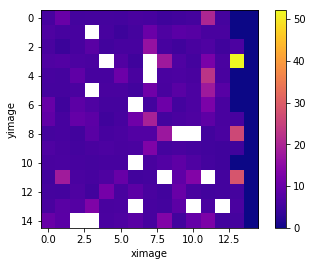

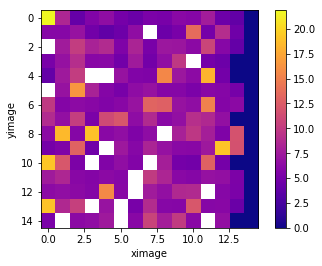

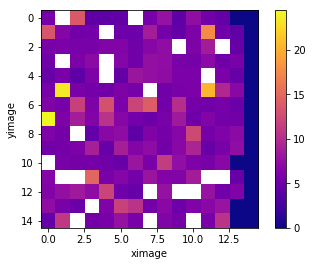

In [30]:
imageNo = 0

for x in range(len(psf)):
    plt.imshow(psf[x],cmap='plasma',interpolation='nearest')
    plt.colorbar()
    plt.xlabel('ximage')
    plt.ylabel('yimage')
    plt.show()

In [20]:
extensions = [44,63,79]
psf = []
for ext in extensions:
    outTable = findObjects(imagename,ext,names[0],names[1])
    psf.append(findPSFFullImage(outTable,imagename,ext))

/data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits[44]
50
z1=43.74463 z2=304.1827
** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Fri 14:05:43 14-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
/data/mj1e16/ke   67.02   39.61    0.18   1.528    0.27     -86
                 712.31  158.86    0.19   1.732    0.19      23
                 418.97  616.75    0.20   1.730    0.17     -85
                 363.23 1014.79    0.89   1.169    0.08     -62
                  41.40  160.62    0.22   1.174    0.12     -74
                 334.59  575.37    0.34   1.194    0.06     -63
                  55.64  281.24    0.34   1.464    0.19     -33
                  48.44  540.69    0.36   1.143    0.08     -60
                 500.77  648.27    0.37   1.495    0.03     -87
                 415.09  326.92    0.37   1.561    0.05      75
                 783.11  923.50    0.41   

                  21.95  436.85    0.60   1.739    0.43     -89
                 923.73  768.00    0.63   1.778    0.20      88
                1095.92  706.39    0.67   1.517    0.40      89
                 419.97  853.94    0.65   1.886    0.32      87
                 489.66  137.00    0.67   1.519    0.45      72
                 844.83 1017.89    1.75   1.248    0.46       0
                 516.19  282.69    0.72   1.512    0.29     -87
                 582.94  926.87    0.70   1.849    0.17     -88
                 207.95 1020.64    1.83   1.398    0.46     -64
                 281.64  695.95    0.72   1.430    0.30      83
                 983.47  443.46    0.76   1.822    0.57      59
                 519.37  281.45    0.00   8.359    0.86     -23
                 443.37 1015.55    1.09   1.019    0.03      40
                 769.32  243.08    0.79   1.472    0.07      -1
                 129.04  650.94    0.76   1.643    0.31      87
                1055.27  859.70    0.76 

In [21]:
psf

[5.1063399999999994, 7.7351299999999998, 6.4476000000000004]

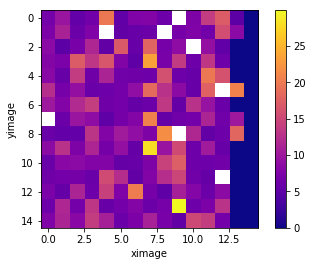

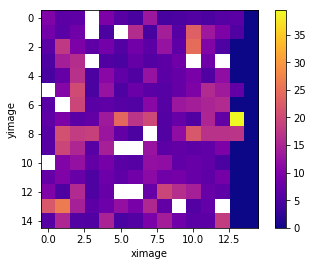

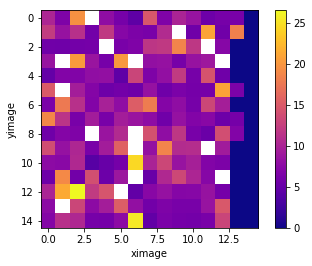

In [260]:
imageNo = 0

for x in range(len(psf)):
    plt.imshow(psf[x],cmap='plasma',interpolation='nearest')
    plt.colorbar()
    plt.xlabel('ximage')
    plt.ylabel('yimage')
    plt.show()

In [219]:
psf[2]

[[1.534, 1.9850000000000001, 1.742, 2.0640000000000001, 1.5109999999999999],
 [3.7949999999999999, 1.464, 1.6679999999999999, 1.542, 5.4119999999999999],
 [1.7035, 2.6520000000000001, 2.3359999999999999, 2.2859999999999996, 1.484],
 [2.1240000000000001,
  1.6625000000000001,
  1.5089999999999999,
  1.7030000000000001,
  1.6950000000000001],
 [2.0960000000000001,
  1.6405000000000001,
  1.7330000000000001,
  1.8210000000000002,
  4.548]]

In [87]:
xcoords = ['pillow','pillow']
ycoords = ['pillow','pillow']

with open('starlist','w') as f:
    writer = csv.writer(f,delimiter=' ')
    writer.writerows(zip(xcoords,ycoords))

In [38]:
df = outTable.to_pandas()
newdf = df.nlargest(1050,'FLUX_ISO')

In [39]:
df2 = newdf[50:1050]

In [45]:
dfbottomtotop = []
os.chdir('/home/mj1e16/iraf/')
length = len(df2)
nsegs = 25
segment = length/nsegs

for segs in range(nsegs):
    low = segs*segment
    high = low+segment
    regiondf = df2.loc[(df['Y_IMAGE'] >= low) & (df['Y_IMAGE'] <= high)]
    xcoords = regiondf['X_IMAGE'].tolist()
    ycoords = regiondf['Y_IMAGE'].tolist()
    with open('starlist','w') as f:
        writer = csv.writer(f,delimiter=' ')
        writer.writerows(zip(xcoords,ycoords))
    psfmeasure('kplr2009115002613_ffi-cal.fits[2]',coords='markall',logfile='logfile_{}_{}'.format('imagename',segs),imagecur='starlist') 


** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Mon 20:01:47 10-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
kplr20091150026  954.77   30.30    0.59   1.471    0.23      54
                 636.38   32.52    1.80   1.354    0.35      75
                 771.76   20.63    2.15   1.672    0.20      54
                 934.28   34.87    2.44   1.308    0.31      54
                 157.70   28.33    0.00   1.999    0.15      71
                1104.99   36.19    4.83   1.293    0.44       4
                 662.95   33.38    2.71   1.942    0.56     -14
                 367.21   29.42    3.22   1.552    0.41       5
                 262.46   23.87    3.27   1.594    0.41      58
                1001.37   35.09    3.51   1.226    0.35      51
                1031.08   33.89    3.57   1.334    0.30      54
                1116.13   14.11    6.72  22.015    0.94     -52


In [15]:
from iraf import psfmeasure

In [10]:
os.chdir('/home/mj1e16/iraf/')

In [20]:
psfmeasure('kplr2009115002613_ffi-cal.fits[44]',coords='markall',logfile='logfile',imagecur='starlist') #)

** Select stars to measure with 'm' and finish with 'q'.
** Additional options are '?', 'g', and :show.
NOAO/IRAF V2.16 mj1e16@uos-201660 Mon 19:56:52 10-Jun-2019

          Image  Column    Line     Mag    FWHM   Ellip      PA SAT
kplr20091150026  684.11  500.74    3.64   1.407    0.17     -69
                 674.83  732.79    0.00   3.940    0.84     -88
                 153.29  644.73    0.24   3.406    0.70     -89

  Average full width at half maximum (FWHM) of 3.6589
